
 # Brazilian E-Commerce Olist Store Performance Analytics with Python 🛒📊


## Importing Required Libraries 📚  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ETL: Extract, Transform, Load 🔄

<div style="color:Black; font-size:22px;">
    <b>Loading and Exploring the Dataset 📂</b>
</div>



In [7]:
orders = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_orders_dataset.csv")
order_items = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_order_items_dataset.csv")
customers = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_customers_dataset.csv")
products = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_products_dataset.csv")
payments = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_order_payments_dataset.csv")
reviews = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_order_reviews_dataset.csv",encoding="latin1")
sellers = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_sellers_dataset.csv", encoding="latin1")
geolocation = pd.read_csv(r"E:\Excelr_ecommerce _project1\E Commerce dataset1\E Commerce dataset\olist_geolocation_dataset.csv")

## Data Cleaning and Transformation 🛠️📊

### Handling Missing Data: Filling or Dropping Nulls 


In [7]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
Weektype                            0
Days                                0
processing _time_minutes            0
processing_time_hours               0
dtype: int64

In [10]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
Weektype                         object
Days                              int64
processing _time_minutes          int64
processing_time_hours             int64
dtype: object

In [9]:
orders["order_approved_at"] = orders["order_approved_at"].fillna(orders["order_purchase_timestamp"])

orders["order_delivered_carrier_date"] = orders["order_delivered_carrier_date"].fillna("Not Delivered")
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna("Not Delivered")


In [10]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
Weektype                         0
Days                             0
processing _time_minutes         0
processing_time_hours            0
dtype: int64

## Data Type Conversions: Ensuring Consistency 🔄

In [12]:
orders["order_delivered_carrier_date"] = pd.to_datetime(
    orders["order_delivered_carrier_date"], format="%d-%m-%Y %H:%M", errors="coerce"
)
orders["order_delivered_customer_date"] = pd.to_datetime(
    orders["order_delivered_customer_date"], format="%d-%m-%Y %H:%M", errors="coerce"
)

orders["order_estimated_delivery_date"] = pd.to_datetime(
    orders["order_estimated_delivery_date"], format="%d-%m-%Y %H:%M", errors="coerce"
)
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"], format="%d-%m-%Y %H:%M", errors="coerce"
)
orders["order_approved_at"] = pd.to_datetime(
    orders["order_approved_at"], format="%d-%m-%Y %H:%M", errors="coerce"
)

 

In [14]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
Weektype                                 object
Days                                      int64
processing _time_minutes                  int64
processing_time_hours                     int64
dtype: object

In [31]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [33]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [14]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"].str.strip(), format="%Y-%m-%d %H:%M:%S")



In [37]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [39]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [41]:
products.dtypes

product_id                    object
product_category_name         object
product_name_lenght            int64
product_description_lenght     int64
product_photos_qty             int64
product_weight_g               int64
product_length_cm              int64
product_height_cm              int64
product_width_cm               int64
dtype: object

In [43]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [45]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [47]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [49]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [51]:
reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [53]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [61]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [63]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

## Merging Datasets: Unifying Data for Deeper Insights 🔄📊

### Understanding How Different Datasets Connect 🔗

In [38]:
df=orders.merge(customers,on="customer_id",how="left")

In [40]:
df=df.merge(order_items,on="order_id",how="left")

In [42]:
df=df.merge(products,on="product_id",how="left")

In [44]:
df=df.merge(payments,on="order_id",how="left")

In [46]:
df=df.merge(reviews,on="order_id",how="left")

In [48]:
df=df.merge(sellers,on="seller_id",how="left")

In [50]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
Weektype                            0
Days                                0
processing _time_minutes            0
processing_time_hours               0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name             833
product_name_lenght               833
product_description_lenght        833
product_photos_qty                833
product_weig

## Handling Duplicates & Overlapping Columns

### Replacing Nulls with Meaningful Values

In [52]:
df['order_delivered_carrier_date'] = df['order_delivered_carrier_date'].astype(str).fillna("Not Delivered")
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].astype(str).fillna("Not Delivered")


### Using 'Unknown' or 'Not Delivered' for Better Analysis 📌

In [54]:
# Fill missing values only if the column exists
if 'payment_type' in df.columns:
    df['payment_type'] = df['payment_type'].fillna("Unknown")

num_cols = ['payment_sequential', 'payment_installments', 'payment_value']
num_cols = [col for col in num_cols if col in df.columns]  # Select existing columns

df[num_cols] = df[num_cols].fillna(0)

# Fill missing review details
review_cols = ['review_id', 'review_comment_title', 'review_comment_message']
review_values = ["No Review", "No Title", "No Comment"]

for col, val in zip(review_cols, review_values):
    if col in df.columns:
        df[col] = df[col].fillna(val)

review_num_cols = ['review_score', 'review_creation_date', 'review_answer_timestamp']
review_num_cols = [col for col in review_num_cols if col in df.columns]

df[review_num_cols] = df[review_num_cols].fillna(0)

# Fill missing seller details
seller_cols = ['seller_zip_code_prefix', 'seller_city', 'seller_state']
seller_cols = [col for col in seller_cols if col in df.columns]

df[seller_cols] = df[seller_cols].fillna("Unknown")

# Fill missing order item details
order_cols = ['order_item_id_y', 'product_id_y', 'seller_id_y', 'shipping_limit_date_y']
order_cols = [col for col in order_cols if col in df.columns]

df[order_cols] = df[order_cols].fillna("Unknown")

num_order_cols = ['price_y', 'freight_value_y']
num_order_cols = [col for col in num_order_cols if col in df.columns]

df[num_order_cols] = df[num_order_cols].fillna(0)

# Check missing values
df.isnull().sum()


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                177
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
Weektype                           0
Days                               0
processing _time_minutes           0
processing_time_hours              0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                    833
product_id                       833
seller_id                        833
shipping_limit_date              833
price                            833
freight_value                    833
product_category_name            833
product_name_lenght              833
product_description_lenght       833
product_photos_qty               833
product_weight_g                 833
p

In [56]:
# Fill missing order delivery dates with "Unknown"
date_cols = ['order_delivered_carrier_date', 'order_delivered_customer_date']
for col in date_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Fill missing numerical values with 0
num_cols = [
    'order_item_id', 'price', 'freight_value', 'product_name_lenght', 
    'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
    'product_length_cm', 'product_height_cm', 'product_width_cm', 
    'payment_sequential', 'payment_installments', 'payment_value',
    'review_score', 'review_creation_date', 'review_answer_timestamp'
]

num_cols = [col for col in num_cols if col in df.columns]
df[num_cols] = df[num_cols].fillna(0)

# Fill missing text/categorical values with "Unknown"
cat_cols = [
    'payment_type', 'review_id', 'review_comment_title', 
    'review_comment_message', 'seller_zip_code_prefix', 'seller_city', 
    'seller_state', 'shipping_limit_date', 'product_category_name', 
    'product_id', 'seller_id'
]

cat_cols = [col for col in cat_cols if col in df.columns]
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Verify that there are no missing values left
print(df.isnull().sum())


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                177
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
Weektype                           0
Days                               0
processing _time_minutes           0
processing_time_hours              0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
p

In [38]:
df.shape

(119143, 43)

# Data Visualization: Uncovering Insights with Charts & Graphs 📊🎨

# Sales Performance  📈

In [34]:
# Total Orders
total_orders = df['order_id'].nunique()

# Total Revenue
total_revenue = df['payment_value'].sum()

# Average Order Value (AOV)
AOV = total_revenue / total_orders

# Top Product Categories by Revenue
category_revenue = df.groupby("product_category_name")["payment_value"].sum().sort_values(ascending=False).head(10)

# Top Sellers by Revenue
seller_revenue = df.groupby("seller_id")["payment_value"].sum().sort_values(ascending=False).head(10)

# Payment Method Distribution
payment_method_distribution = df['payment_type'].value_counts(normalize=True) * 100


## Total Sales or Revenue Over Time 📊  

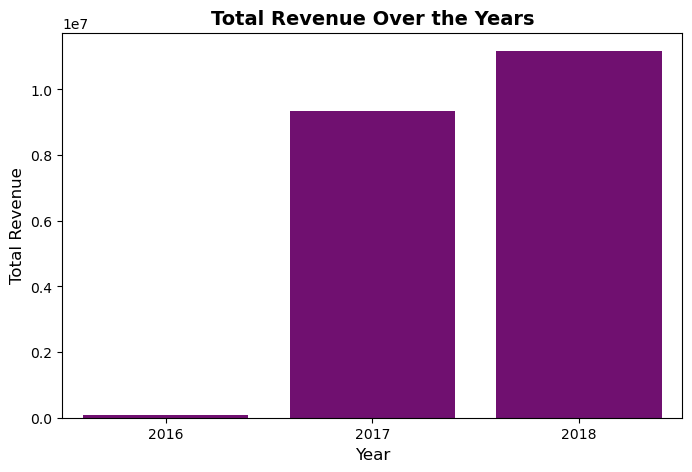

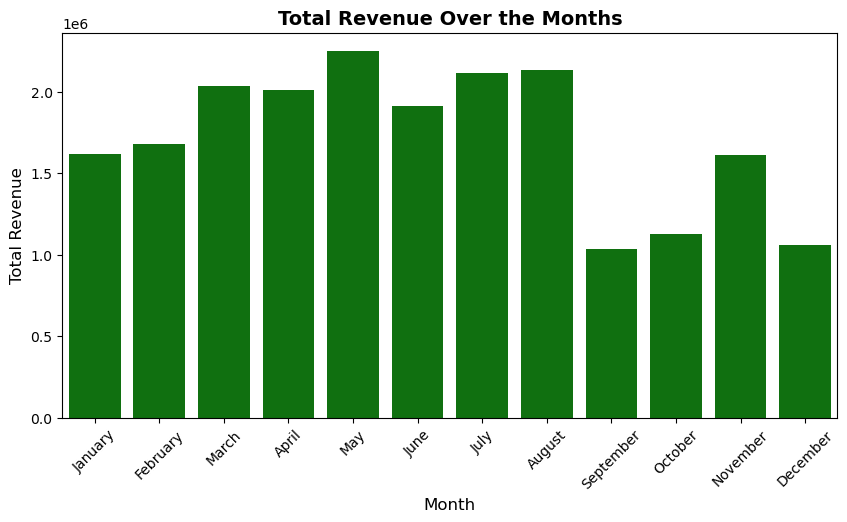

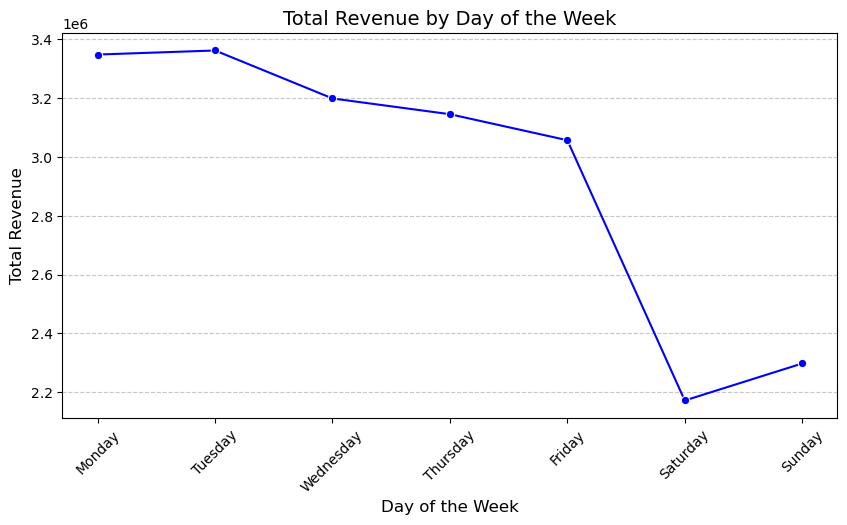

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], errors='coerce')

# Extract date components
df["Year"] = df["order_purchase_timestamp"].dt.year
df["Month"] = df["order_purchase_timestamp"].dt.month
df["Day"] = df["order_purchase_timestamp"].dt.day
df["Month_Name"] = df["order_purchase_timestamp"].dt.strftime('%B')  # Full month name
df["order_day_name"] = df["order_purchase_timestamp"].dt.day_name()  # Weekday name

# Grouping total revenue
revenue_yearly = df.groupby("Year", dropna=True)["payment_value"].sum().reset_index()
revenue_monthly = df.groupby("Month_Name", dropna=True)["payment_value"].sum().reset_index()
revenue_daily = df.groupby("Day", dropna=True)["payment_value"].sum().reset_index()
revenue_by_day = df.groupby("order_day_name", dropna=True)["payment_value"].sum()

# Reorder the days correctly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day = revenue_by_day.reindex(day_order)

# Sort months correctly
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
revenue_monthly["Month_Name"] = pd.Categorical(revenue_monthly["Month_Name"], 
                                               categories=month_order, ordered=True)
revenue_monthly = revenue_monthly.sort_values("Month_Name")

# 📊 Plot Revenue Over the Years
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="payment_value", data=revenue_yearly, color="purple")
plt.title("Total Revenue Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 📊 Plot Revenue Over the Months
plt.figure(figsize=(10, 5))
sns.barplot(x="Month_Name", y="payment_value", data=revenue_monthly, color="green")
plt.title("Total Revenue Over the Months", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 📊 Plot Revenue by Day of the Week
# 📈 Line Plot for Revenue by Day of the Week
plt.figure(figsize=(10, 5))
sns.lineplot(x=revenue_by_day.index, y=revenue_by_day.values, marker="o", linestyle="-", color="blue")
plt.title("Total Revenue by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Weekday vs Weekend Total Revenue

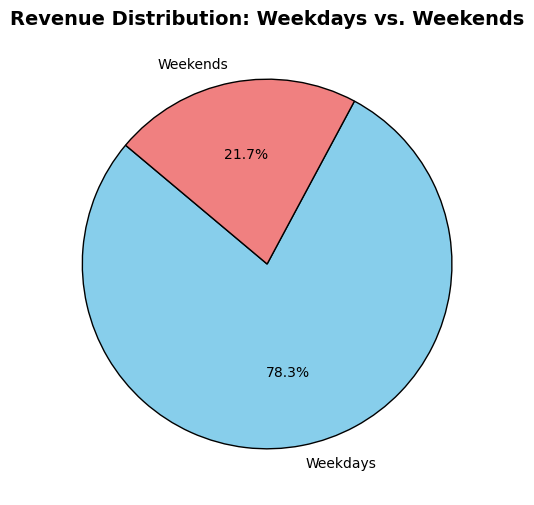

In [36]:
# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Calculate total revenue for weekdays and weekends
weekday_revenue = revenue_by_day.loc[weekdays].sum()
weekend_revenue = revenue_by_day.loc[weekends].sum()

# Create a dictionary for pie chart labels and values
revenue_data = {'Weekdays': weekday_revenue, 'Weekends': weekend_revenue}

# 📊 Pie Chart for Weekday vs. Weekend Revenue
plt.figure(figsize=(6, 6))
plt.pie(revenue_data.values(), labels=revenue_data.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Revenue Distribution: Weekdays vs. Weekends", fontsize=14, fontweight='bold')
plt.show()


## Total Orders Over Time 

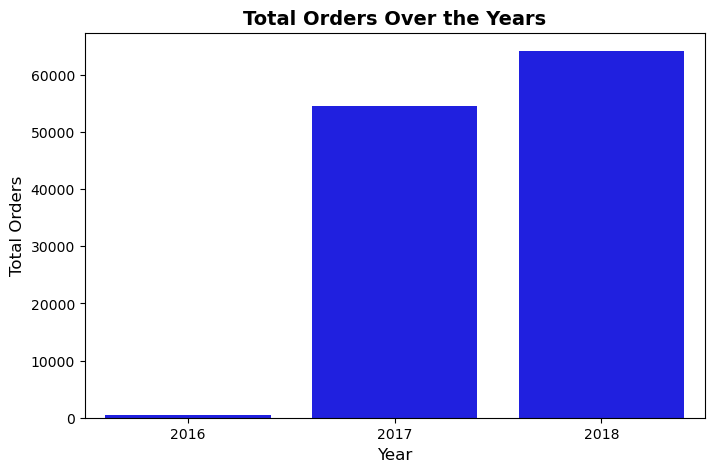

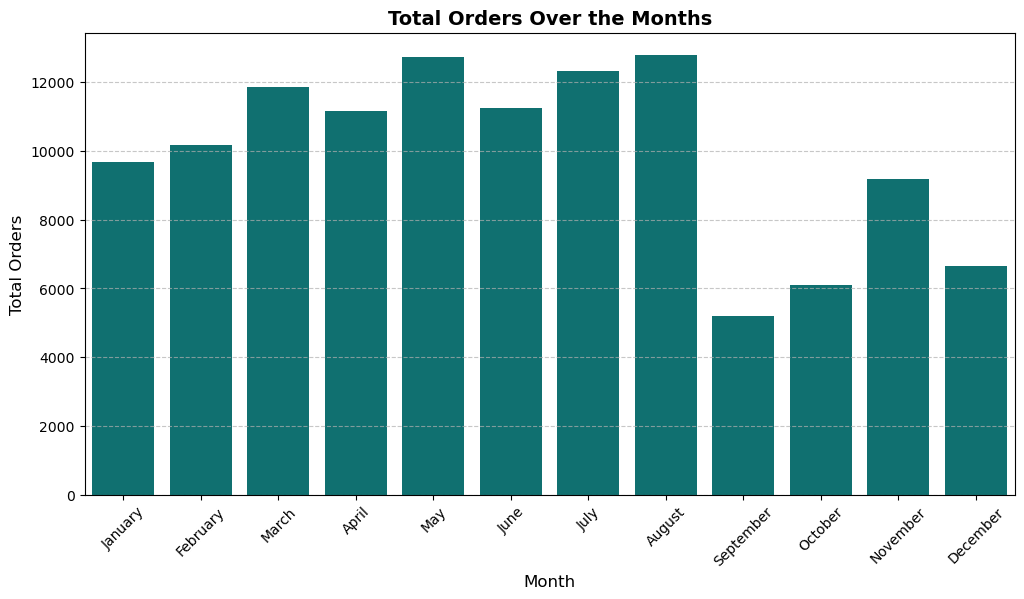

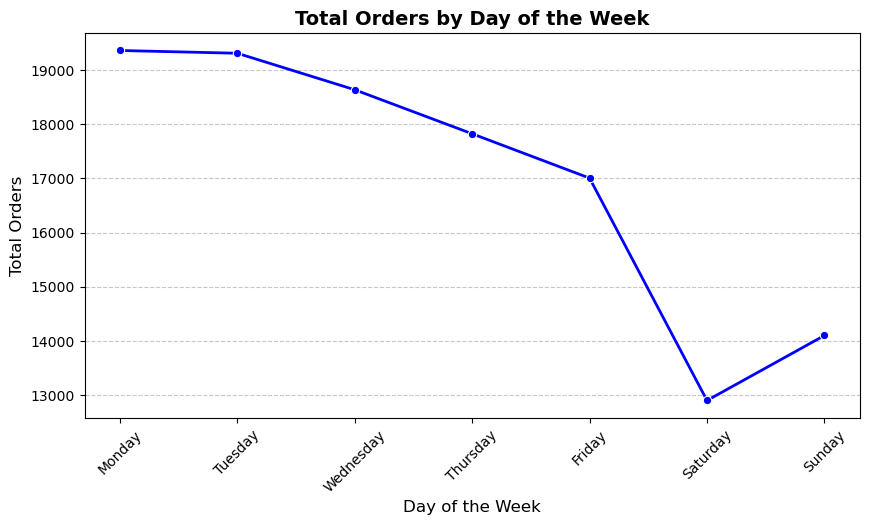

In [39]:
# Extract Year, Month Name, and Day of the Week from order timestamps
df["Year"] = df["order_purchase_timestamp"].dt.year
df["Month_Name"] = df["order_purchase_timestamp"].dt.strftime('%B')  # Full month name
df["order_day_name"] = df["order_purchase_timestamp"].dt.day_name()  # Day of the week

# Group by Year to get total orders per year
orders_yearly = df.groupby("Year")["order_id"].count().reset_index().rename(columns={"order_id": "Total Orders"})

# Group by Month to get total orders per month
orders_monthly = df.groupby("Month_Name")["order_id"].count().reset_index().rename(columns={"order_id": "Total Orders"})

# Group by Day of the Week to get total orders per day
orders_by_day = df.groupby("order_day_name")["order_id"].count()

# 📌 Ensure months are in correct order
month_order = ["January", "February", "March", "April", "May", "June", "July", 
               "August", "September", "October", "November", "December"]
orders_monthly["Month_Name"] = pd.Categorical(orders_monthly["Month_Name"], categories=month_order, ordered=True)
orders_monthly = orders_monthly.sort_values("Month_Name")

# 📌 Ensure days are in correct order (Monday–Sunday)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
orders_by_day = orders_by_day.reindex(day_order)

# 📊 Plot Total Orders Over the Years
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Total Orders", data=orders_yearly, color="blue")
plt.title("Total Orders Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 📊 Plot Total Orders Over the Months
plt.figure(figsize=(12, 6))
sns.barplot(x="Month_Name", y="Total Orders", data=orders_monthly, color="teal")
plt.title("Total Orders Over the Months", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x=orders_by_day.index, y=orders_by_day.values, marker="o", color="blue", linewidth=2)

# Title & Labels
plt.title("Total Orders by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

## Top 10 Cities by Revenue & Orders

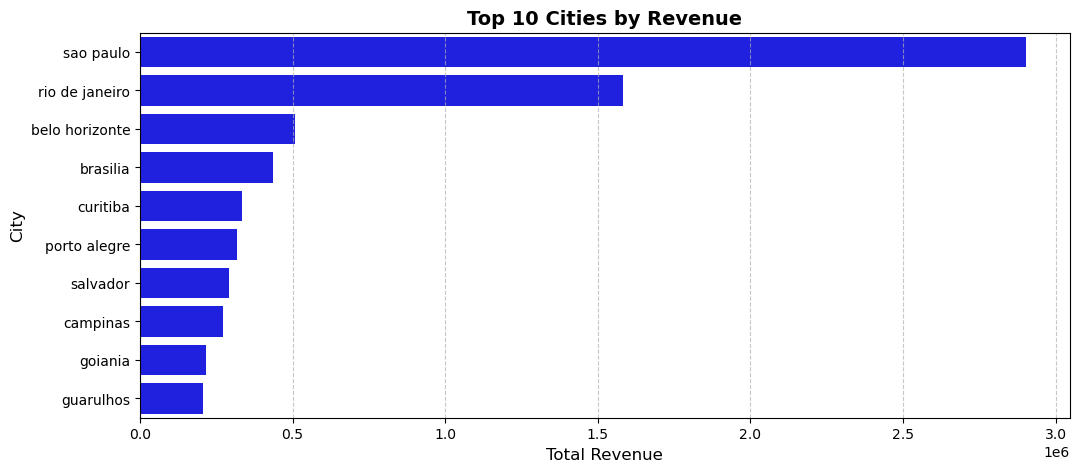

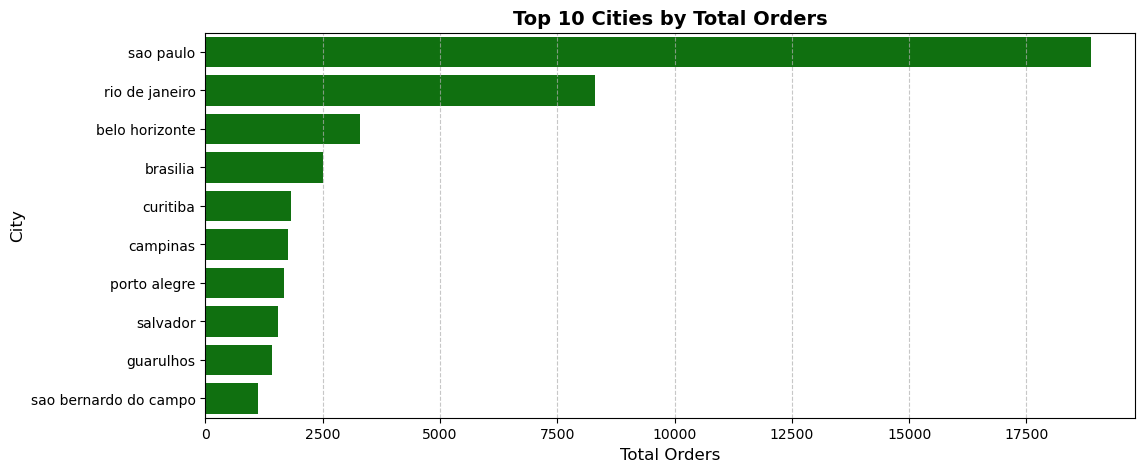

In [42]:
# Top 10 Cities by Revenue
top_cities_revenue = df.groupby("customer_city")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Cities by Orders
top_cities_orders = df.groupby("customer_city")["order_id"].count().nlargest(10).reset_index()

# 📊 Plot Top 10 Cities by Revenue
plt.figure(figsize=(12, 5))
sns.barplot(x="payment_value", y="customer_city", data=top_cities_revenue, color="blue")
plt.title("Top 10 Cities by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Top 10 Cities by Orders
plt.figure(figsize=(12, 5))
sns.barplot(x="order_id", y="customer_city", data=top_cities_orders, color="green")
plt.title("Top 10 Cities by Total Orders", fontsize=14, fontweight='bold')
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Top 10 Product Categories by Revenue & Orders

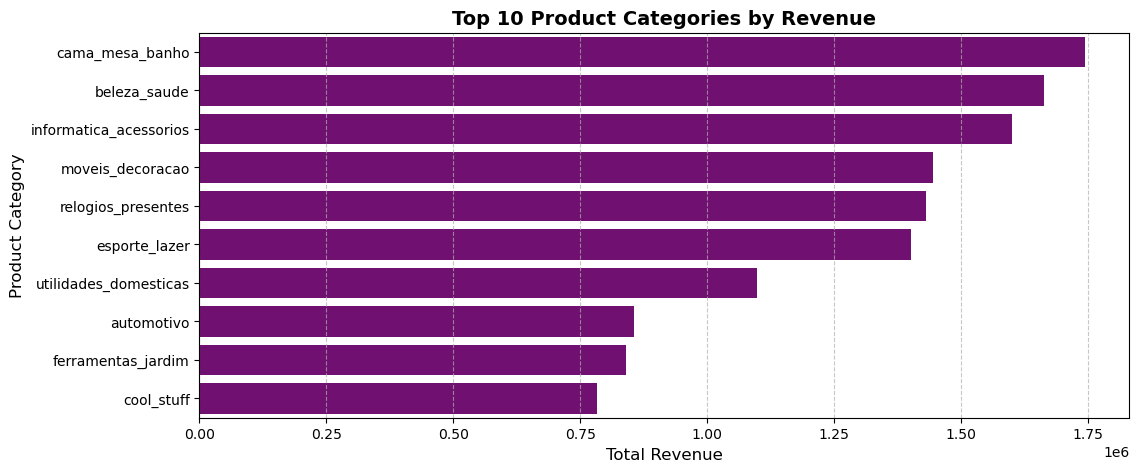

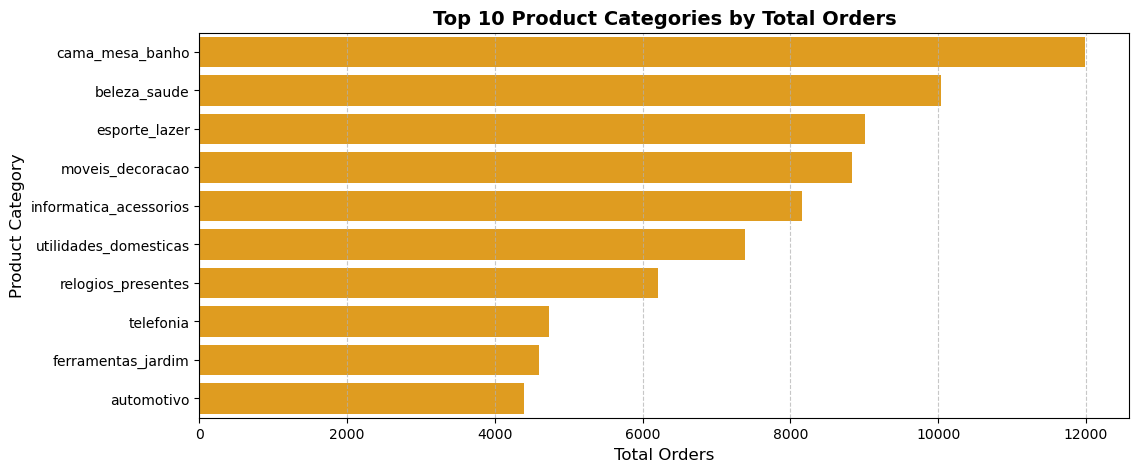

In [44]:
# Top 10 Categories by Revenue
top_categories_revenue = df.groupby("product_category_name")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Categories by Orders
top_categories_orders = df.groupby("product_category_name")["order_id"].count().nlargest(10).reset_index()

# 📊 Plot Top 10 Product Categories by Revenue
plt.figure(figsize=(12, 5))
sns.barplot(x="payment_value", y="product_category_name", data=top_categories_revenue, color="purple")
plt.title("Top 10 Product Categories by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Top 10 Product Categories by Orders
plt.figure(figsize=(12, 5))
sns.barplot(x="order_id", y="product_category_name", data=top_categories_orders, color="orange")
plt.title("Top 10 Product Categories by Total Orders", fontsize=14, fontweight='bold')
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Top 10 Sellers by Revenue & Orders

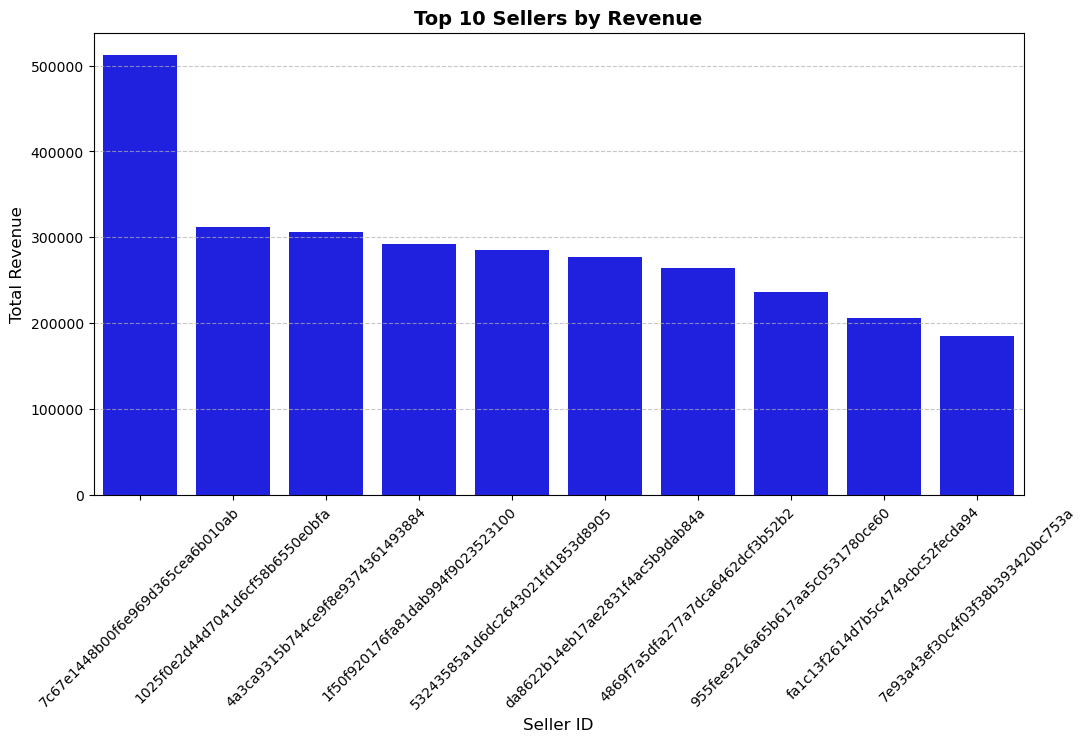

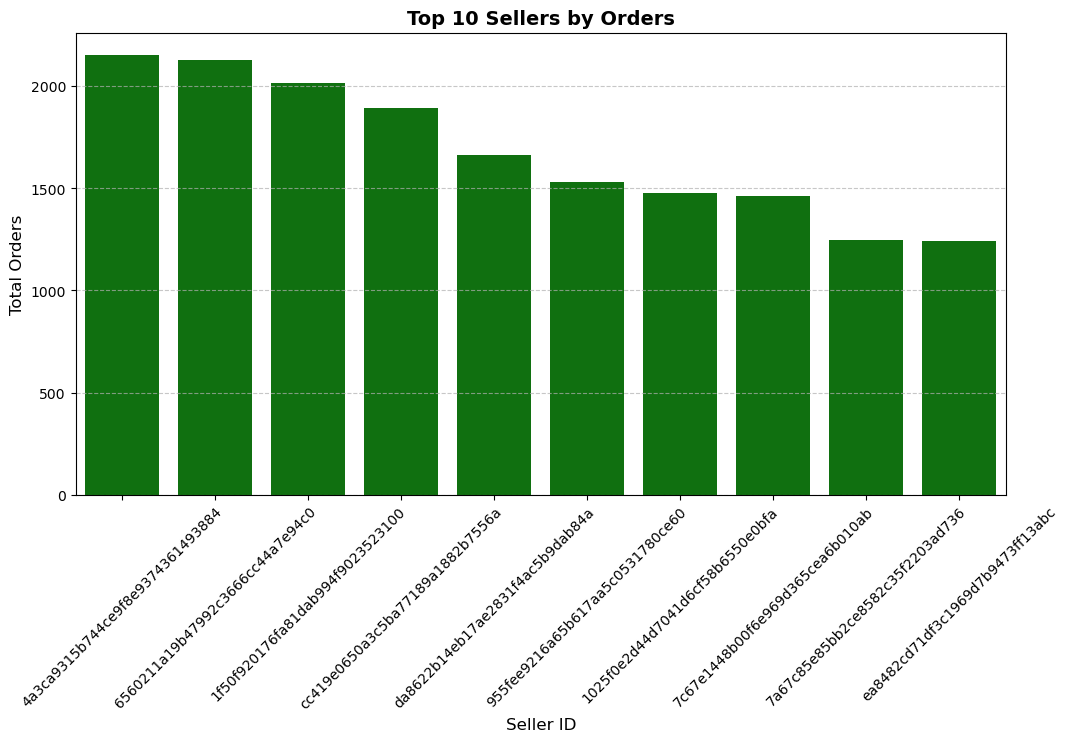

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Sellers by Revenue
top_sellers_revenue = df.groupby("seller_id")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Sellers by Orders
top_sellers_orders = df.groupby("seller_id")["order_id"].count().nlargest(10).reset_index()

# 📊 Column Chart for Top 10 Sellers by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="payment_value", data=top_sellers_revenue, color="blue")
plt.title("Top 10 Sellers by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)  # Rotate seller IDs for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Column Chart for Top 10 Sellers by Orders
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="order_id", data=top_sellers_orders, color="green")
plt.title("Top 10 Sellers by Orders", fontsize=14, fontweight='bold')
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Payment Method Distribution

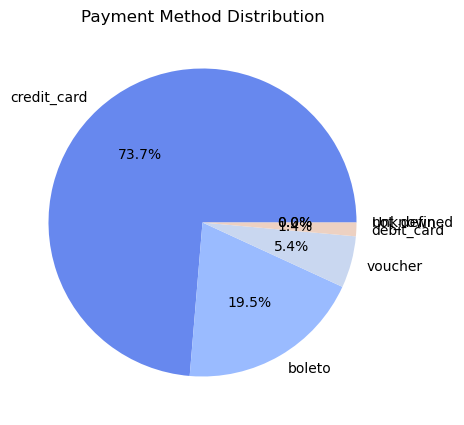

In [48]:
# Payment Method Distribution
plt.figure(figsize=(8,5))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(payment_method_distribution)))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


# 2.  Order Processing & Delivery Time Analysis


In [38]:
# Convert to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Average Delivery Time
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
avg_delivery_time = df['delivery_time_days'].mean()

# On-Time Delivery Rate
on_time_deliveries = df[df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']].shape[0]
on_time_delivery_rate = (on_time_deliveries / df.shape[0]) * 100

# Delayed Deliveries Count
delayed_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']].shape[0]

# Average Processing Time (converted to days)
avg_processing_time = df['processing_time_hours'].mean() / 24

#shipping days
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df = df.dropna(subset=['shipping_days'])
# Calculate actual delivery time (days)
df["actual_delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["estimated_delivery_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days



# Correlation b/w processing_time_hours, price, freight_value, payment_value

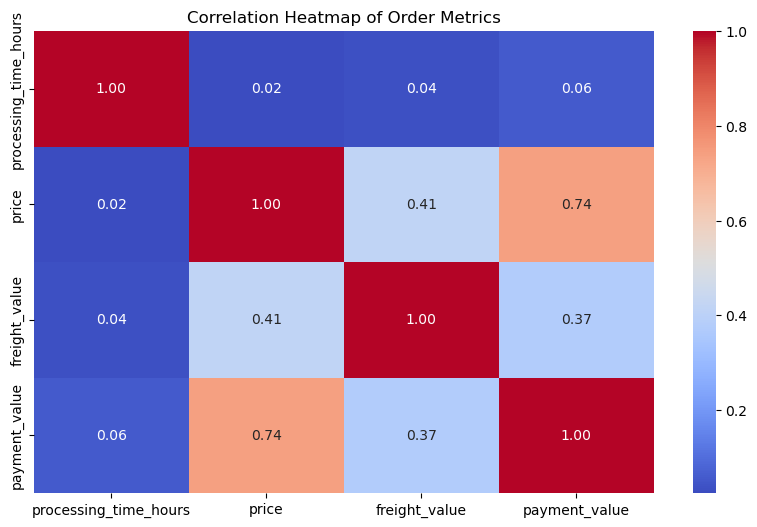

In [40]:
import numpy as np

plt.figure(figsize=(10, 6))
corr = df[["processing_time_hours", "price", "freight_value", "payment_value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Order Metrics")
plt.show()


## Distribution of Delivery Time

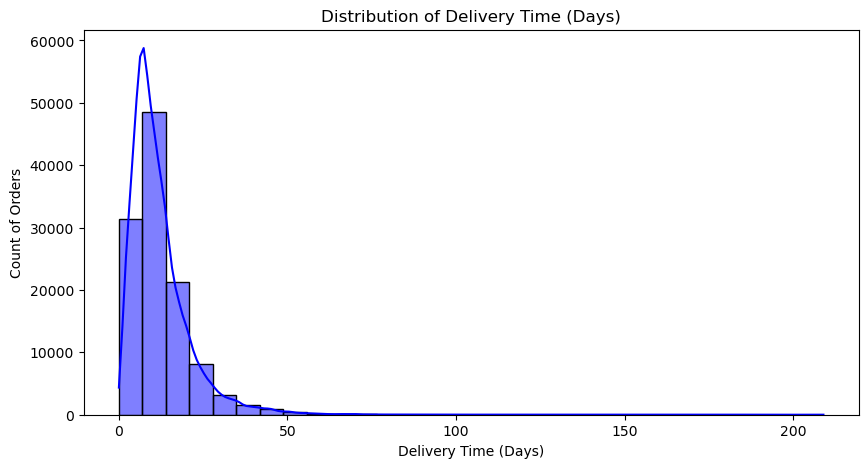

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df["delivery_time_days"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery Time (Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Count of Orders")
plt.show()


## On-Time Deliveries vs Delayed Deliveries

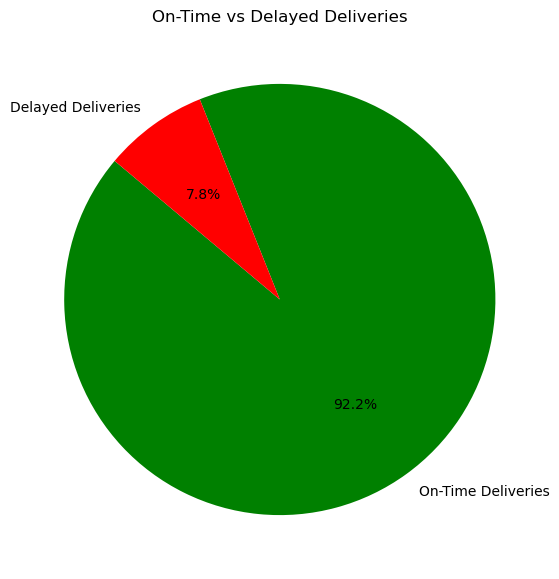

In [44]:
labels = ["On-Time Deliveries", "Delayed Deliveries"]
sizes = [on_time_deliveries, delayed_deliveries]
colors = ["green", "red"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("On-Time vs Delayed Deliveries")
plt.show()


## Freight Cost vs Delivery Time 

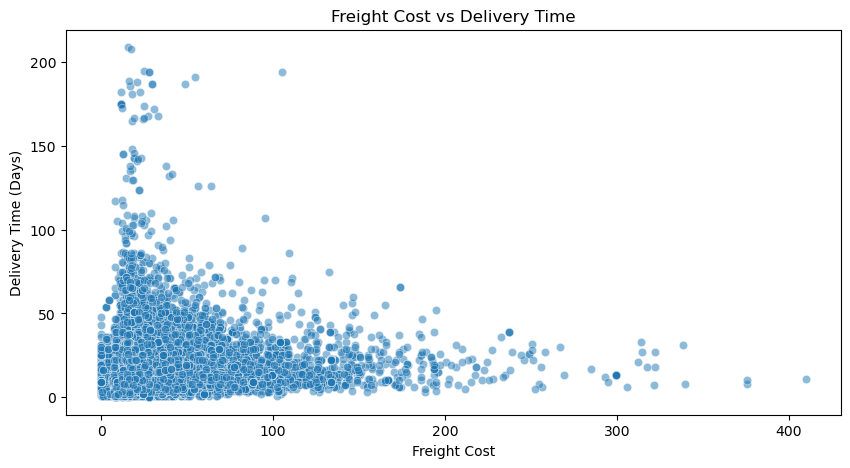

In [118]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["freight_value"], y=df["delivery_time_days"], alpha=0.5)
plt.title("Freight Cost vs Delivery Time")
plt.xlabel("Freight Cost")
plt.ylabel("Delivery Time (Days)")
plt.show()


## Delivery Time vs Review Score

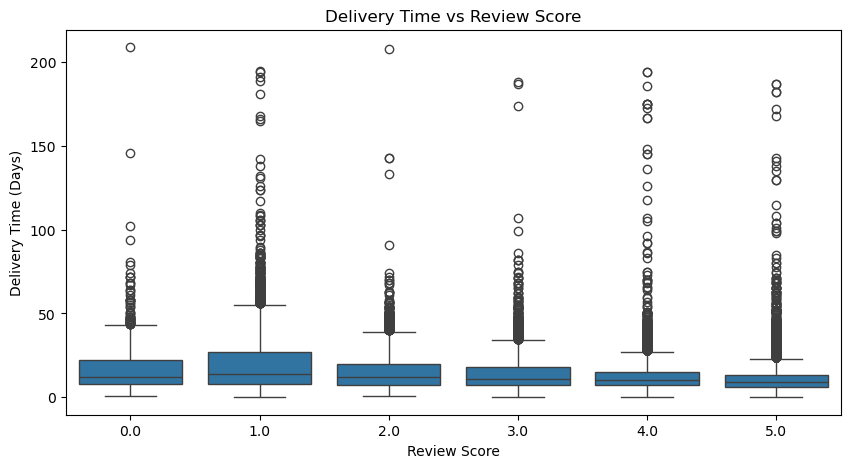

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["review_score"], y=df["delivery_time_days"])
plt.title("Delivery Time vs Review Score")
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (Days)")
plt.show()


## Shipping_Days vs Review Score

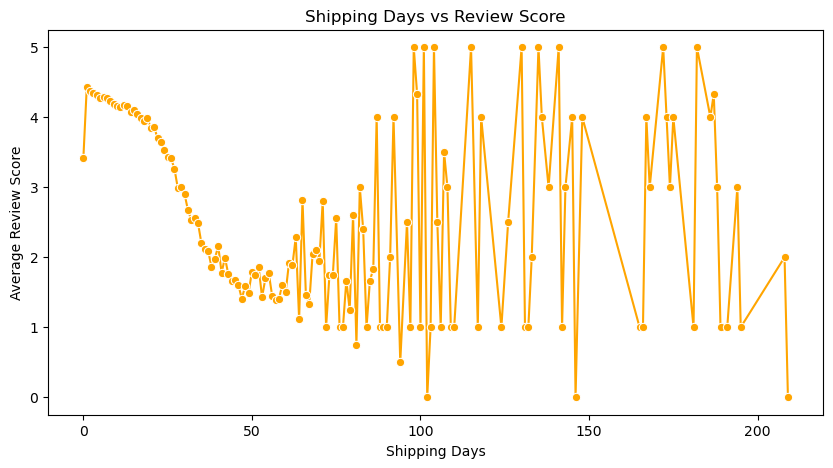

In [64]:
shipping_review = df.groupby("shipping_days")["review_score"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=shipping_review["shipping_days"], y=shipping_review["review_score"], marker="o", color="orange")
plt.title("Shipping Days vs Review Score")
plt.xlabel("Shipping Days")
plt.ylabel("Average Review Score")
plt.show()


## Top 10 Fastest Sellers and Top 10 Slowest Sellers

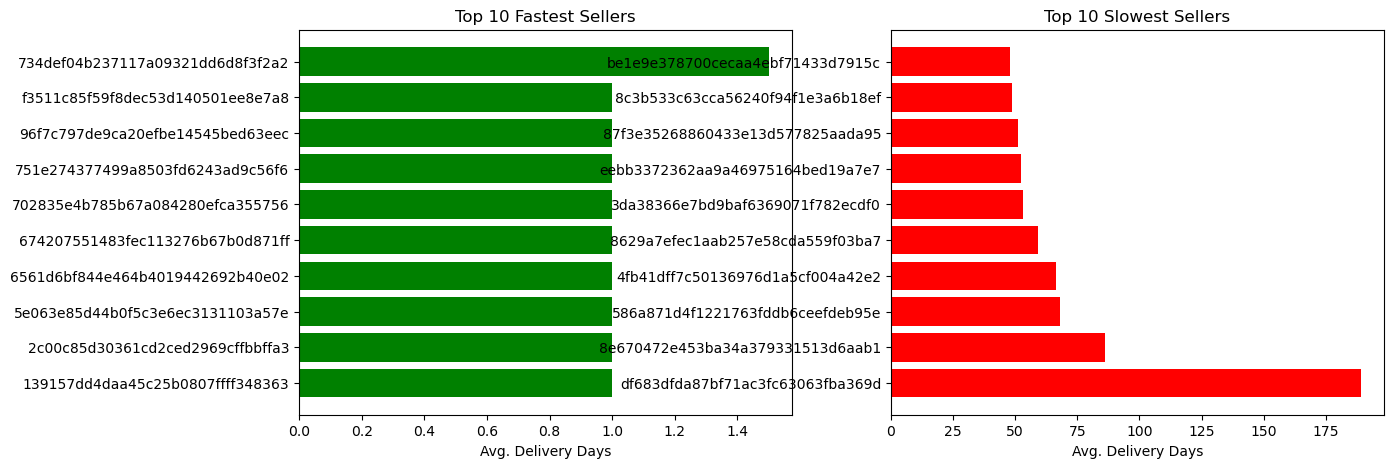

In [66]:
seller_delivery = df.groupby("seller_id")["actual_delivery_days"].mean().reset_index()
top_fastest_sellers = seller_delivery.nsmallest(10, "actual_delivery_days")
top_slowest_sellers = seller_delivery.nlargest(10, "actual_delivery_days")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Fastest Sellers
ax[0].barh(top_fastest_sellers["seller_id"], top_fastest_sellers["actual_delivery_days"], color="green")
ax[0].set_title("Top 10 Fastest Sellers")
ax[0].set_xlabel("Avg. Delivery Days")

# Slowest Sellers
ax[1].barh(top_slowest_sellers["seller_id"], top_slowest_sellers["actual_delivery_days"], color="red")
ax[1].set_title("Top 10 Slowest Sellers")
ax[1].set_xlabel("Avg. Delivery Days")

plt.show()


## Delivey Time over Time

## Avg Actual vs Estimated Delivery time over year

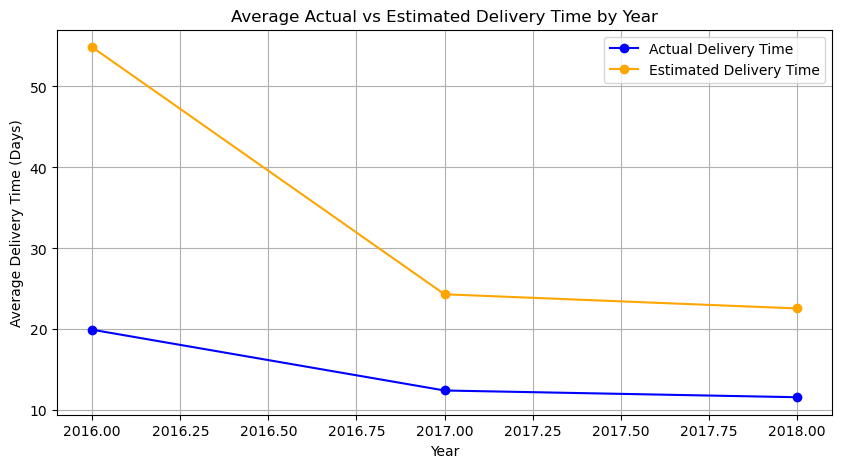

In [68]:
import matplotlib.pyplot as plt

# Extract year from order timestamp
df["order_year"] = df["order_purchase_timestamp"].dt.year

# Group by year and calculate average actual & estimated delivery time
yearly_avg_delivery = df.groupby("order_year").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Yearly Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_delivery["order_year"], yearly_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(yearly_avg_delivery["order_year"], yearly_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

plt.xlabel("Year")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Year")
plt.legend()
plt.grid(True)

plt.show()


## Avg Actual vs Estimated Delivery time over months

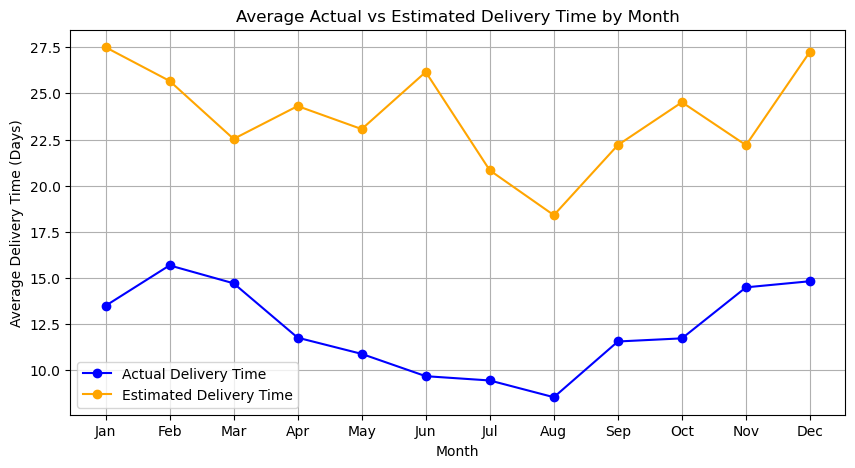

In [70]:
# Extract the month from the order timestamp
df["order_month"] = df["order_purchase_timestamp"].dt.month

# Group by month and calculate average actual & estimated delivery time
monthly_avg_delivery = df.groupby("order_month").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Monthly Trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_delivery["order_month"], monthly_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(monthly_avg_delivery["order_month"], monthly_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

# Formatting the Plot
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Month")
plt.legend()
plt.grid(True)

plt.show()


## Avg Actual vs Estimated Delivery Time Over Days

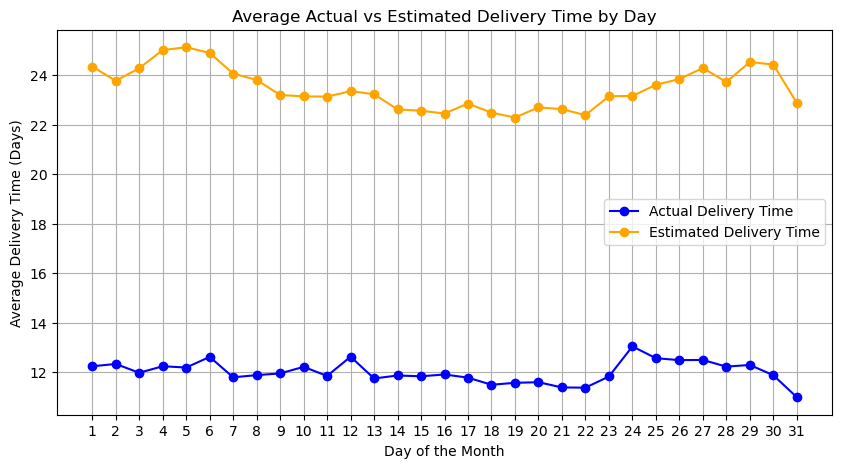

In [72]:
# Extract day from order timestamp
df["order_day"] = df["order_purchase_timestamp"].dt.day

# Group by day and calculate average actual & estimated delivery time
daily_avg_delivery = df.groupby("order_day").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Daily Trend
plt.figure(figsize=(10, 5))
plt.plot(daily_avg_delivery["order_day"], daily_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(daily_avg_delivery["order_day"], daily_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

plt.xticks(range(1, 32))  # Days 1 to 31
plt.xlabel("Day of the Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Day")
plt.legend()
plt.grid(True)

plt.show()


## Top 10 Cities: Processing Time vs Actual & Estimated Delivery Time

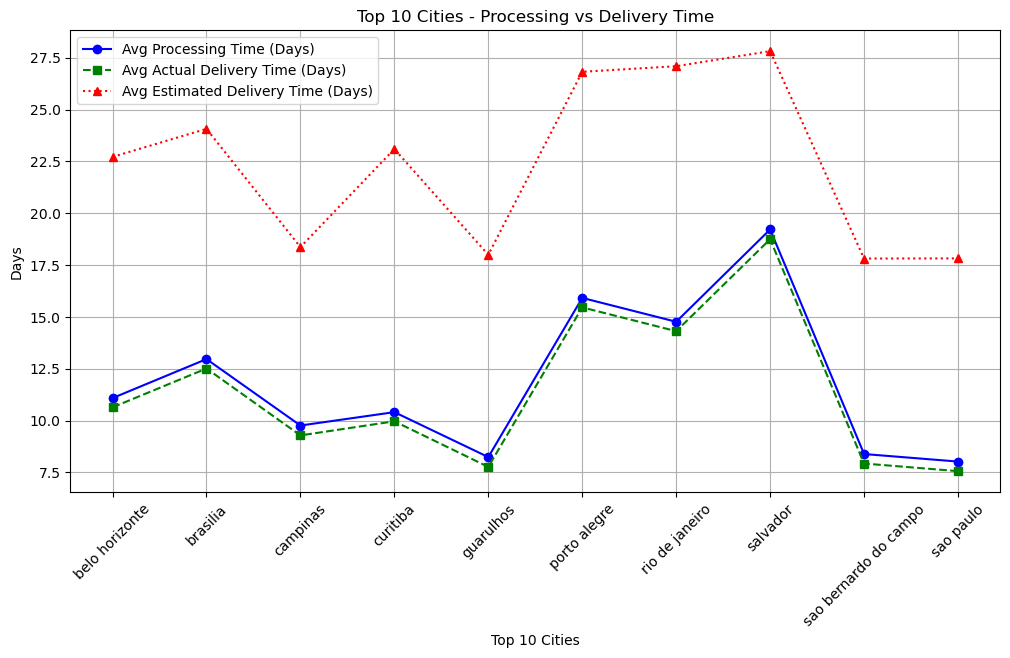

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamps to datetime format
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Compute time metrics
df["processing_time_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / (3600 * 24)
df["actual_delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["estimated_delivery_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# Group and filter top 10 cities
city_data = df.groupby("customer_city").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_cities = df["customer_city"].value_counts().index[:10]
filtered_city_data = city_data[city_data["customer_city"].isin(top_10_cities)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 Cities")
plt.ylabel("Days")
plt.title("Top 10 Cities - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 Cities - Processing vs Delivery Time

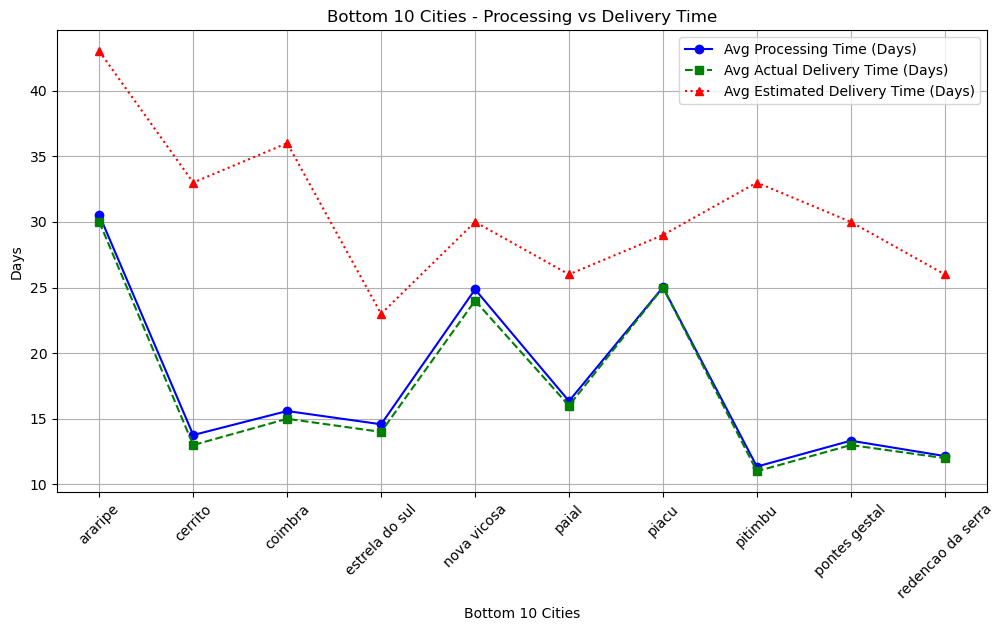

In [76]:
# Get bottom 10 cities
bottom_10_cities = df["customer_city"].value_counts().index[-10:]
filtered_city_data = city_data[city_data["customer_city"].isin(bottom_10_cities)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 Cities")
plt.ylabel("Days")
plt.title("Bottom 10 Cities - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Top 10 States - Processing vs Delivery Time

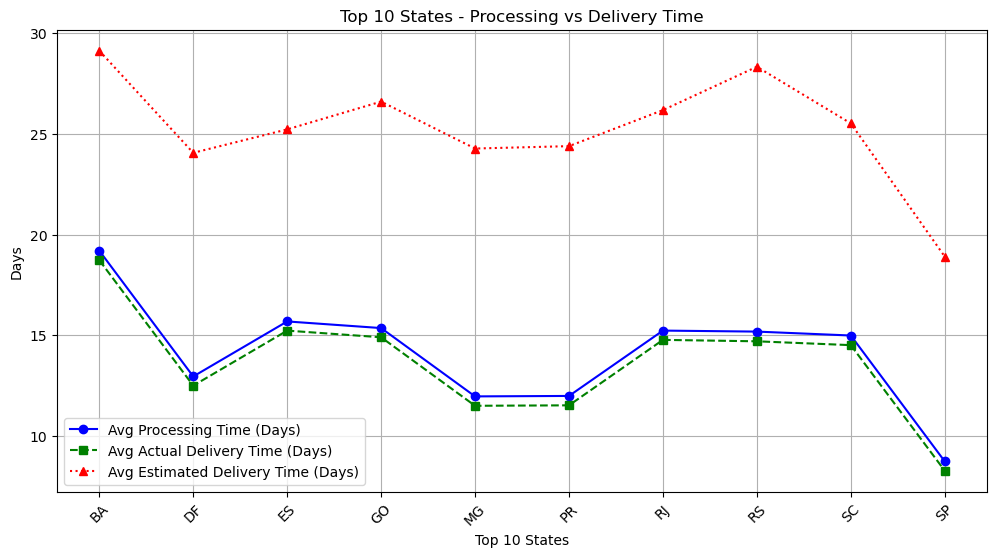

In [78]:
# Group and filter top 10 states
state_data = df.groupby("customer_state").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_states = df["customer_state"].value_counts().index[:10]
filtered_state_data = state_data[state_data["customer_state"].isin(top_10_states)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 States")
plt.ylabel("Days")
plt.title("Top 10 States - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 States - Processing vs Delivery Time

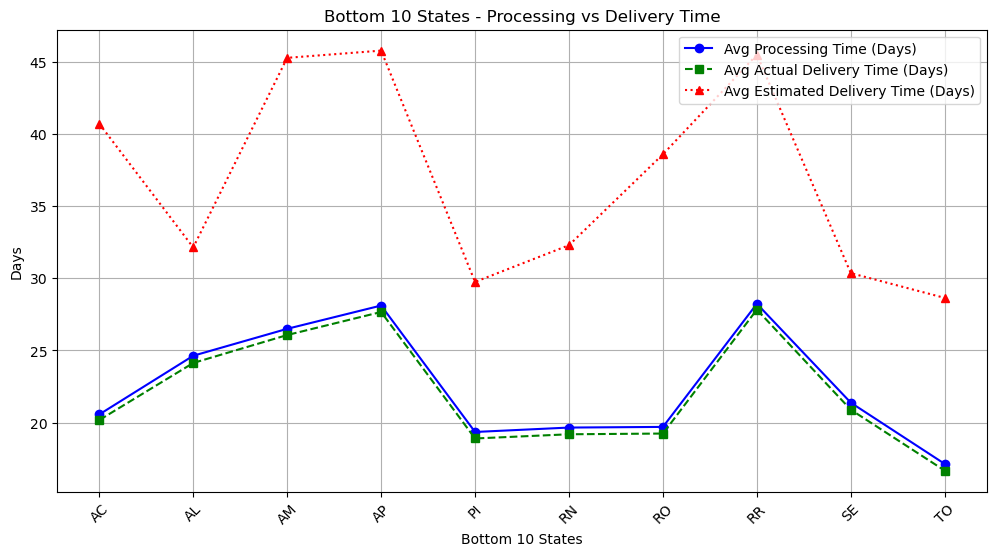

In [80]:
# Get bottom 10 states
bottom_10_states = df["customer_state"].value_counts().index[-10:]
filtered_state_data = state_data[state_data["customer_state"].isin(bottom_10_states)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 States")
plt.ylabel("Days")
plt.title("Bottom 10 States - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Top 10 Categories - Processing vs Delivery Time

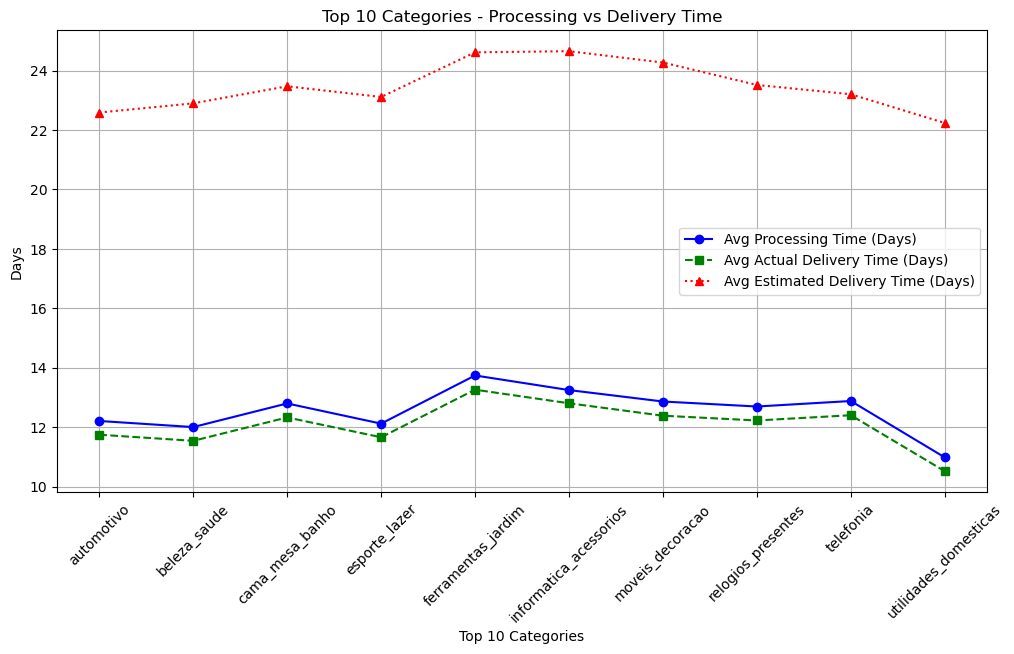

In [82]:
# Group and filter top 10 categories
category_data = df.groupby("product_category_name").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_categories = df["product_category_name"].value_counts().index[:10]
filtered_category_data = category_data[category_data["product_category_name"].isin(top_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 Categories")
plt.ylabel("Days")
plt.title("Top 10 Categories - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 Categories - Processing vs Delivery Time

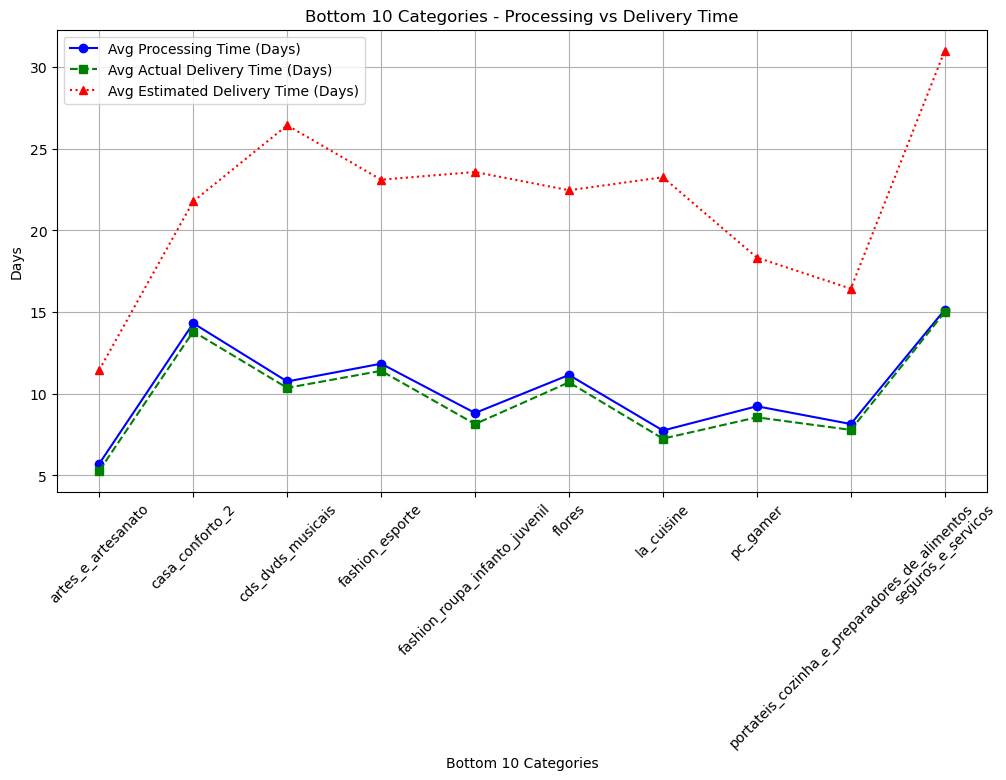

In [84]:
# Get bottom 10 categories
bottom_10_categories = df["product_category_name"].value_counts().index[-10:]
filtered_category_data = category_data[category_data["product_category_name"].isin(bottom_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 Categories")
plt.ylabel("Days")
plt.title("Bottom 10 Categories - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# 📊 3. Customer Churn &Behavioural  Analysis

In [133]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Total Customers
total_customers = df['customer_unique_id'].nunique()

# New vs. Returning Customers
returning_customers = df[df.duplicated(subset=['customer_unique_id'], keep=False)]['customer_unique_id'].nunique()
new_customers = total_customers - returning_customers
returning_customer_rate = (returning_customers / total_customers) * 100

# Average Orders per Customer
average_orders_per_customer = df.groupby('customer_unique_id')['order_id'].count().mean()

# Customer Lifetime Value (CLV)
clv = df.groupby('customer_unique_id')['payment_value'].sum().mean()

# Churn Rate (Customers with no orders in last 6 months)
six_months_ago = df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
churned_customers = df[df['order_purchase_timestamp'] < six_months_ago]['customer_unique_id'].nunique()
churn_rate = (churned_customers / total_customers) * 100

# Average Order Value (AOV)
average_order_value = df['payment_value'].mean()

# Top 10 Customers by Revenue
top_customers = df.groupby('customer_unique_id')['payment_value'].sum().nlargest(10)

# Order Frequency by Customer
order_frequency = df.groupby('customer_unique_id')['order_id'].count()

# Revenue by Customer Location
revenue_by_location = df.groupby('customer_city')['payment_value'].sum()
# 1. Customer Retention Rate
active_customers = df[df['order_purchase_timestamp'] >= six_months_ago]['customer_unique_id'].nunique()
customer_retention_rate = (active_customers / total_customers) * 100

# 2. Average Processing Time (Time from order to delivery)
df['processing_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
average_processing_time = df['processing_time_days'].mean()

# 3. On-Time Delivery Rate (Orders delivered before estimated date)
on_time_deliveries = df[df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']].shape[0]
on_time_delivery_rate = (on_time_deliveries / df.shape[0]) * 100

# 4. Late Deliveries
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']].shape[0]

# 5. Average Review Score per Customer
avg_review_score = df.groupby('customer_unique_id')['review_score'].mean().mean()

# 6. Payment Method Distribution
payment_method_counts = df['payment_type'].value_counts()

# 7. Revenue per Customer
revenue_per_customer = df.groupby('customer_unique_id')['payment_value'].sum()
 


## New vs. Returning Customers 

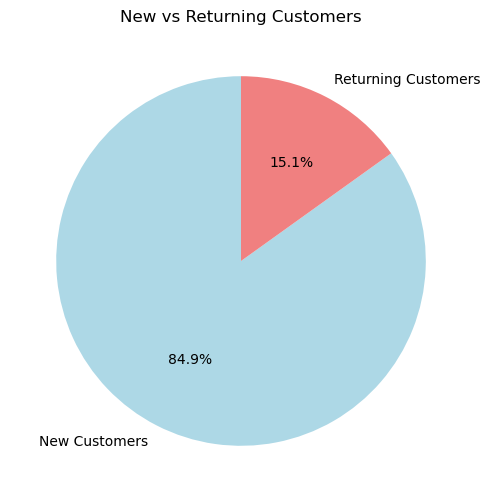

In [54]:
labels = ['New Customers', 'Returning Customers']
sizes = [new_customers, returning_customers]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("New vs Returning Customers")
plt.show()


## Customer Retention vs Churn Rate

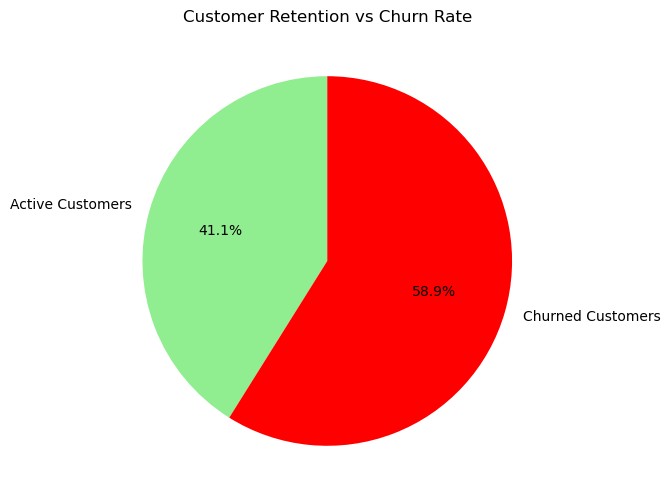

In [75]:
labels = ['Active Customers', 'Churned Customers']
sizes = [active_customers, churned_customers]
colors = ['lightgreen', 'red']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Customer Retention vs Churn Rate")
plt.show()


## Top 10 Most Loyal Customers

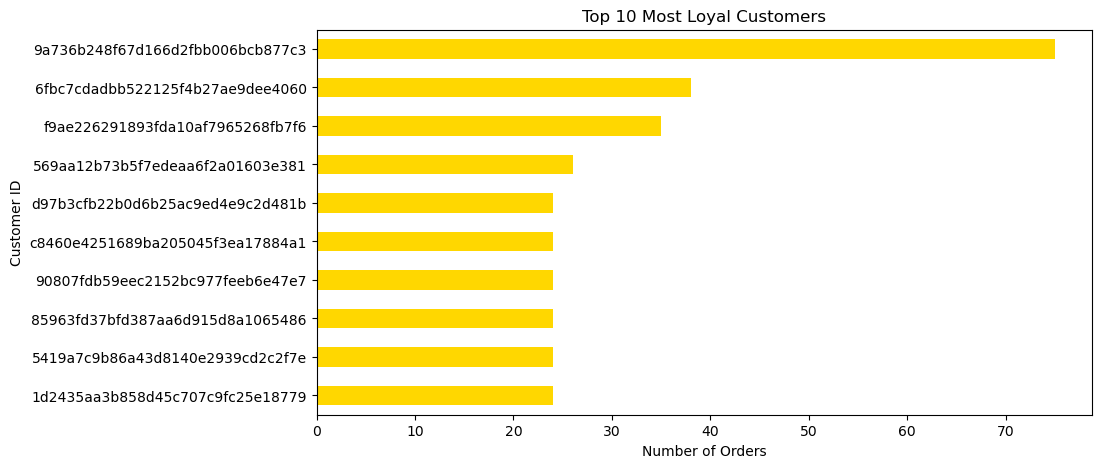

In [81]:
loyal_customers = df.groupby('customer_unique_id')['order_id'].count().nlargest(10)

plt.figure(figsize=(10,5))
loyal_customers.sort_values().plot(kind='barh', color='gold')
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.title("Top 10 Most Loyal Customers")
plt.show()


## Monthly Active Customers

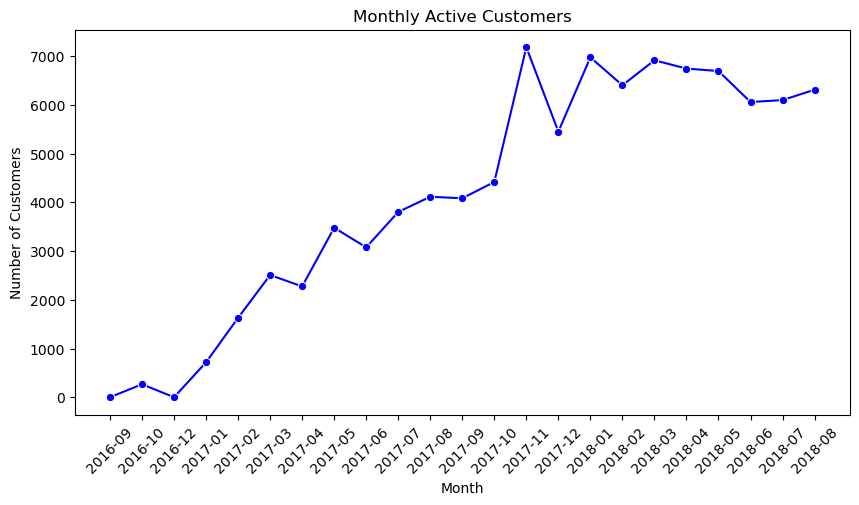

In [57]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_active_customers = df.groupby('order_month')['customer_unique_id'].nunique()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_active_customers.index.astype(str), y=monthly_active_customers.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Active Customers")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()


## Top 10 Customers by Revenue

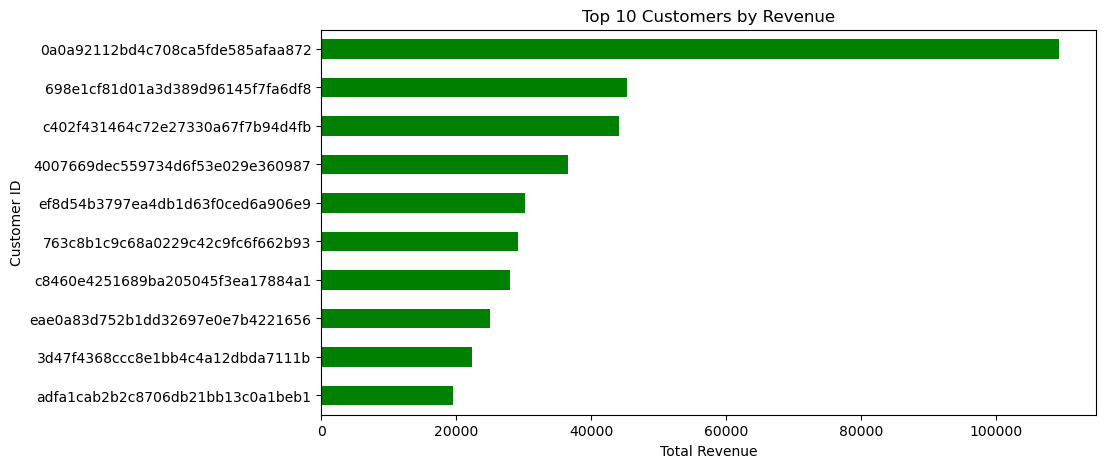

In [62]:
plt.figure(figsize=(10,5))
top_customers.sort_values().plot(kind='barh', color='green')
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Revenue")
plt.show()


## Top 10 Revenue Generating Locations

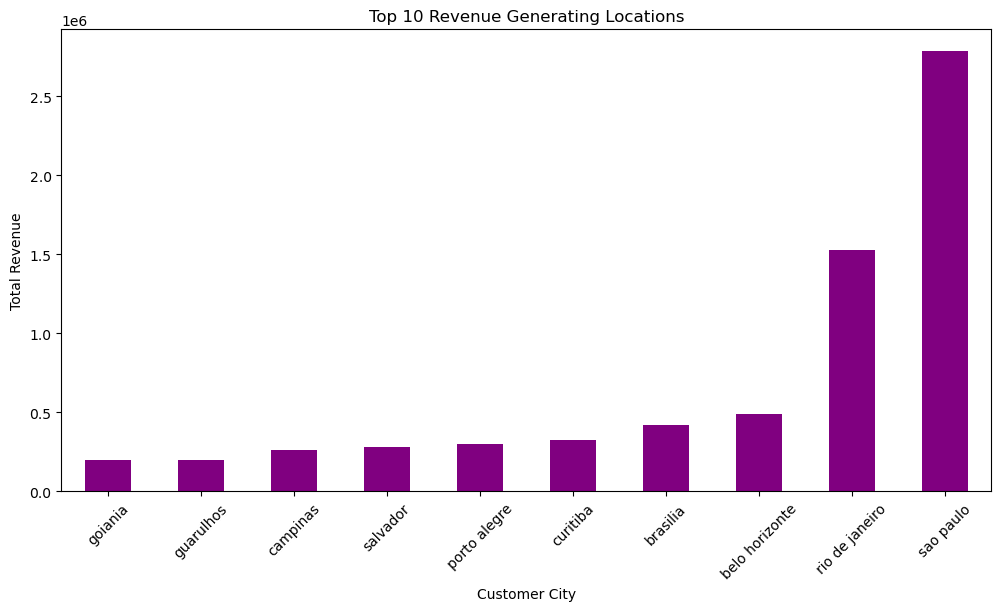

In [64]:
top_locations = revenue_by_location.nlargest(10)

plt.figure(figsize=(12,6))
top_locations.sort_values().plot(kind='bar', color='purple')
plt.ylabel("Total Revenue")
plt.xlabel("Customer City")
plt.title("Top 10 Revenue Generating Locations")
plt.xticks(rotation=45)
plt.show()


## Customer Churn Analysis

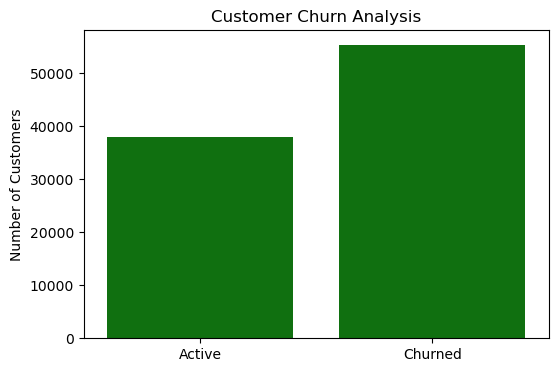

In [162]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Active', 'Churned'], y=[total_customers - churned_customers, churned_customers], color='green')
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis")
plt.show()


# 1️⃣ Customer Analysis KPIs

In [89]:
# Total Customers
total_customers = df['customer_unique_id'].nunique()

# Repeat Customers (Customers with more than 1 order)
repeat_customers = df[df.duplicated(subset=['customer_unique_id'], keep=False)]['customer_unique_id'].nunique()

# Customer Retention Rate
customer_retention_rate = (repeat_customers / total_customers) * 100

# New Customers (Customers with only 1 order)
new_customers = total_customers - repeat_customers

# Churn Rate (Customers who did not reorder)
customer_churn_rate = (new_customers / total_customers) * 100

# Average Orders per Customer
avg_orders_per_customer = df.groupby('customer_unique_id')['order_id'].count().mean()

# Top 10 Cities by Customer Count
top_cities = df['customer_city'].value_counts().head(10)

# Top 10 States by Customer Count
top_states = df['customer_state'].value_counts().head(10)

 

# 2️⃣ Churn Analysis KPIs

In [95]:
# Orders per Customer
customer_order_counts = df.groupby('customer_unique_id')['order_id'].count()

# Churned Customers (Only 1 order)
churned_customers = customer_order_counts[customer_order_counts == 1].count()

# Active Customers (More than 1 order)
active_customers = customer_order_counts[customer_order_counts > 1].count()

# Churn Rate
churn_rate = (churned_customers / total_customers) * 100
 

## Customer Distribution by Day of the Week

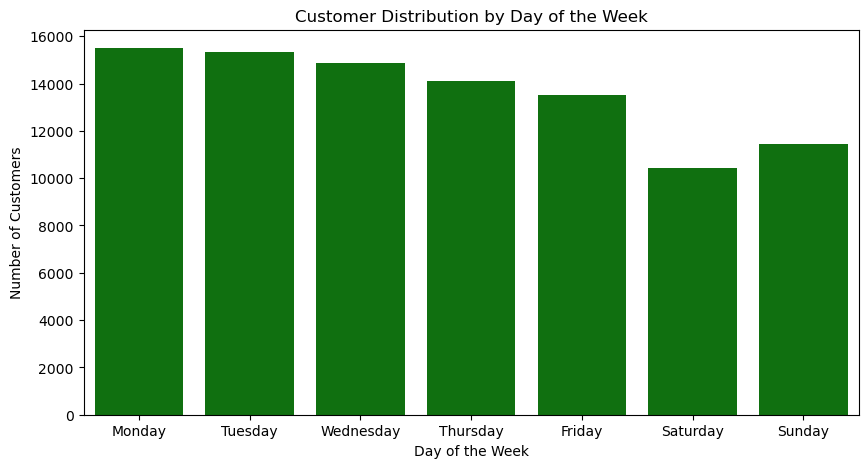

In [156]:
# Convert order timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract day name
df['order_day_name'] = df['order_purchase_timestamp'].dt.day_name()

# Group by day of the week
customers_per_day = df.groupby('order_day_name')['customer_unique_id'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=customers_per_day.index, y=customers_per_day.values,  color="Green")
plt.title("Customer Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()


## Customer Distribution by Month

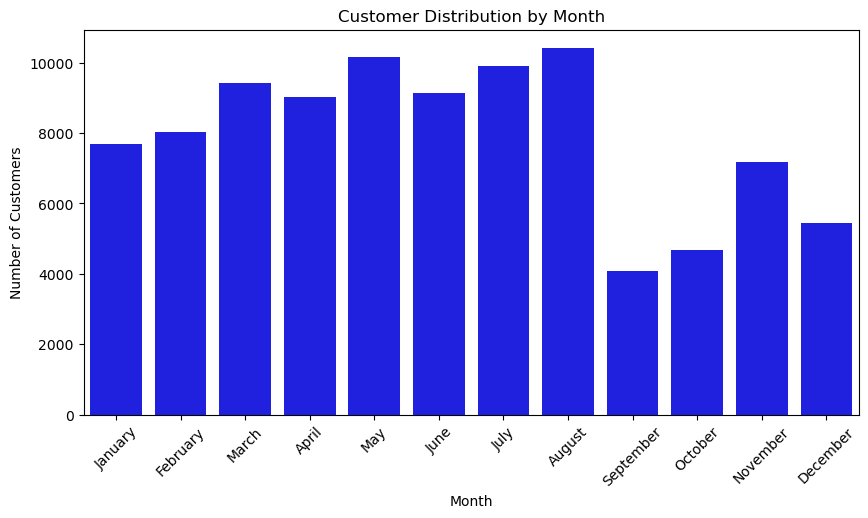

In [154]:
# Extract month names
df['order_month_name'] = df['order_purchase_timestamp'].dt.month_name()

# Group by month
customers_per_month = df.groupby('order_month_name')['customer_unique_id'].nunique().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=customers_per_month.index, y=customers_per_month.values, color="Blue")
plt.title("Customer Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


## Customer Distribution by Year

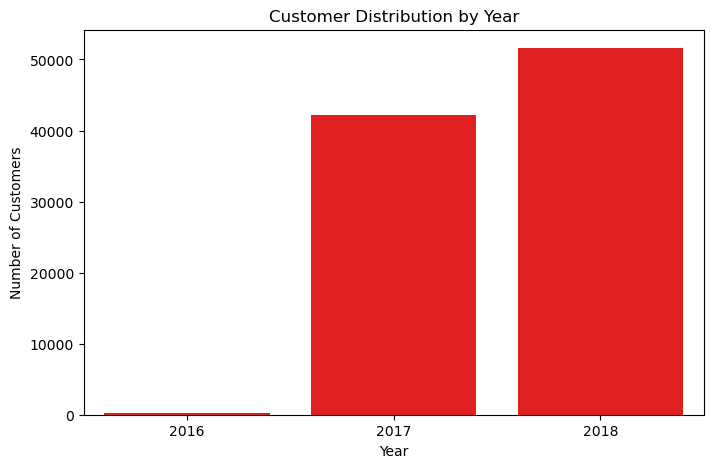

In [152]:
# Extract year
df['order_year'] = df['order_purchase_timestamp'].dt.year

# Filter only years 2016, 2017, 2018
customers_per_year = df[df['order_year'].isin([2016, 2017, 2018])].groupby('order_year')['customer_unique_id'].nunique()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=customers_per_year.index.astype(str), y=customers_per_year.values, color="red")
plt.title("Customer Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()


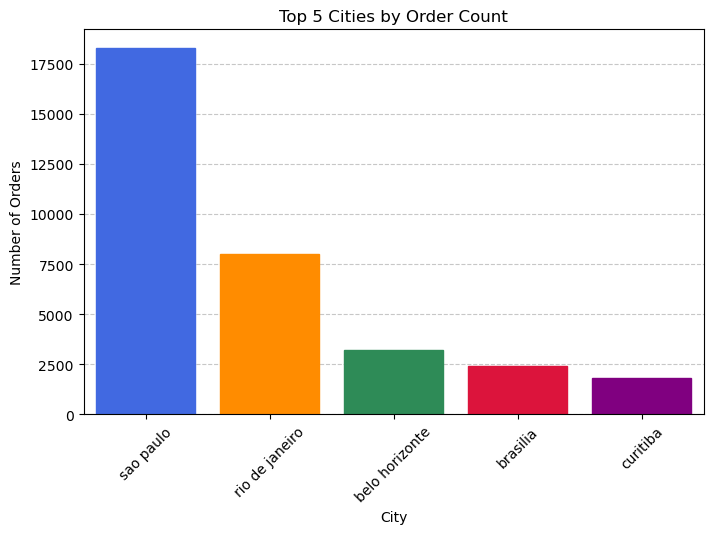

In [158]:
# Get total unique customers
total_customers = df['customer_unique_id'].nunique()

# Get top 5 cities by order count
top_cities = df['customer_city'].value_counts().head(5)

# Define custom colors
colors = ['royalblue', 'darkorange', 'seagreen', 'crimson', 'purple']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, zorder=2)

# Apply colors manually
for i, bar in enumerate(plt.gca().containers[0]):
    bar.set_color(colors[i])

plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 5 Cities by Order Count')
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.show()

## Top 10 Cities by Customer Count

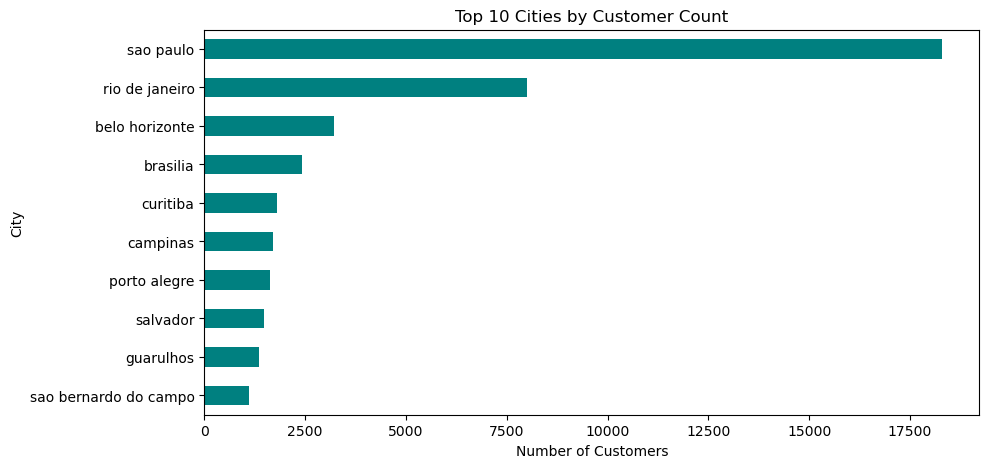

In [101]:
plt.figure(figsize=(10,5))
top_cities.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.title("Top 10 Cities by Customer Count")
plt.show()


## Top 10 States by Customer Count

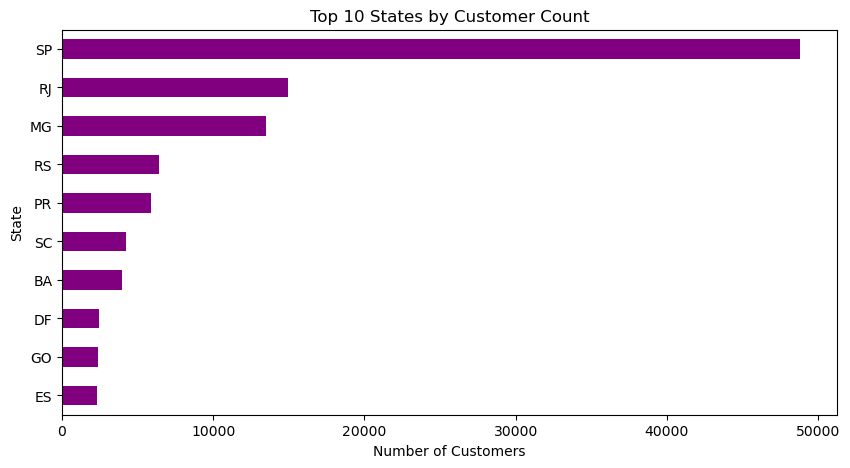

In [103]:
plt.figure(figsize=(10,5))
top_states.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.title("Top 10 States by Customer Count")
plt.show()


## Top 5 Cities by Order Count

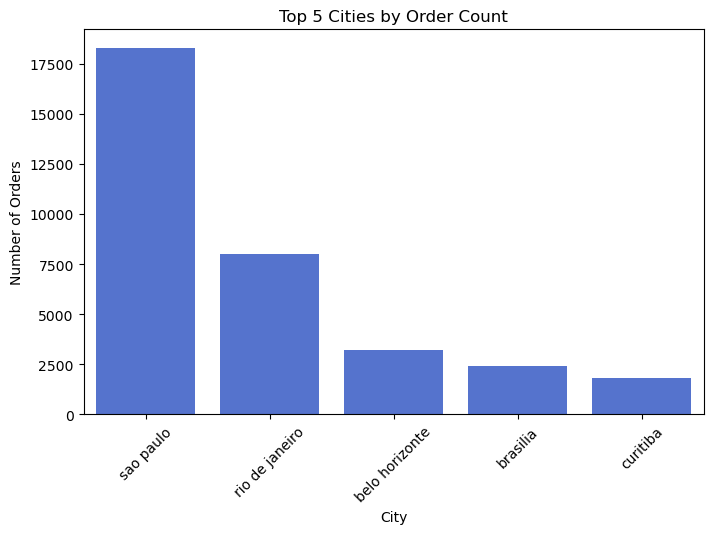

In [148]:
total_customers = df['customer_unique_id'].nunique()
top_cities = df['customer_city'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, color="royalblue") 
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 5 Cities by Order Count')
plt.xticks(rotation=45)
plt.show()


In [127]:
# Total Customers
total_customers = df['customer_id'].nunique()

# Customer Distribution by State
customer_state_distribution = df['customer_state'].value_counts()

# Repeat vs. New Customers
repeat_customers = df['customer_id'].value_counts().gt(1).sum()
new_customers = total_customers - repeat_customers

# Top Cities by Total Revenue
top_cities_revenue = df.groupby("customer_city")["payment_value"].sum().sort_values(ascending=False).head(10)


## Customer Distribution by State

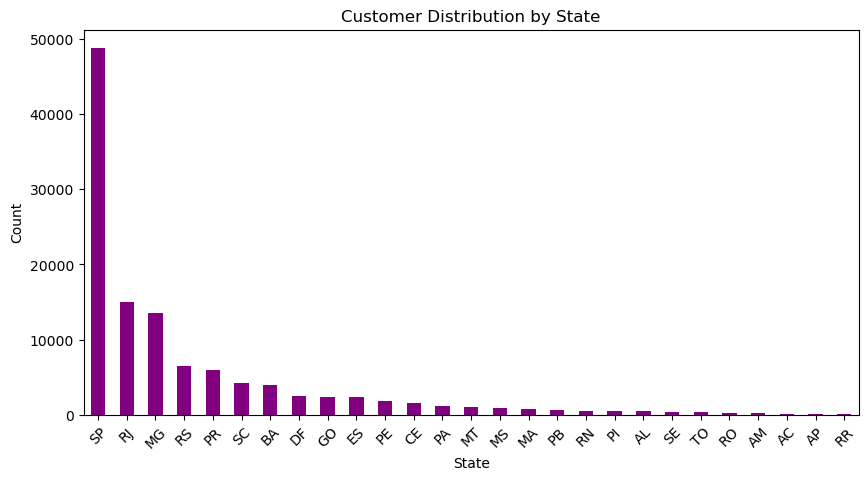

In [131]:
# Customer Distribution by State
plt.figure(figsize=(10,5))
customer_state_distribution.plot(kind='bar', color='purple')
plt.title("Customer Distribution by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Top 10 Cities by Total Revenue

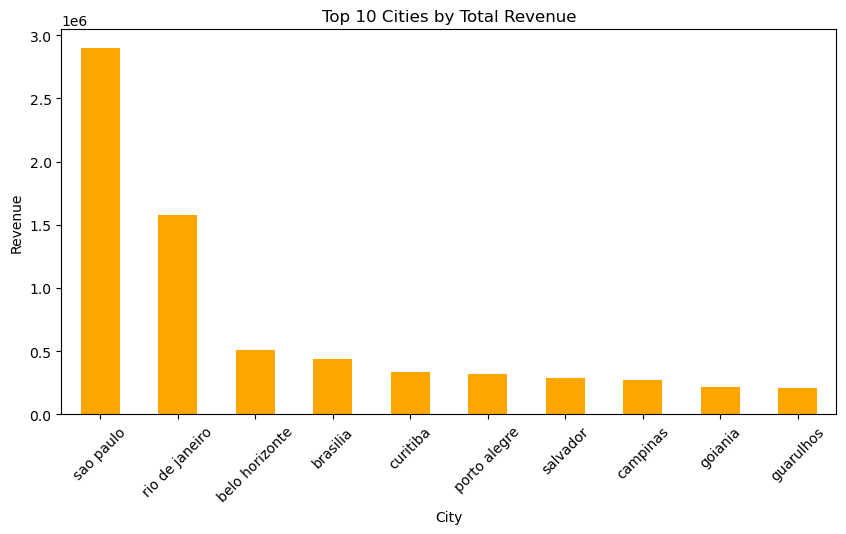

In [153]:
# Top 10 Cities by Total Revenue
plt.figure(figsize=(10,5))
top_cities_revenue.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


# 📊 4. Review Analysis

## Review Score Distribution

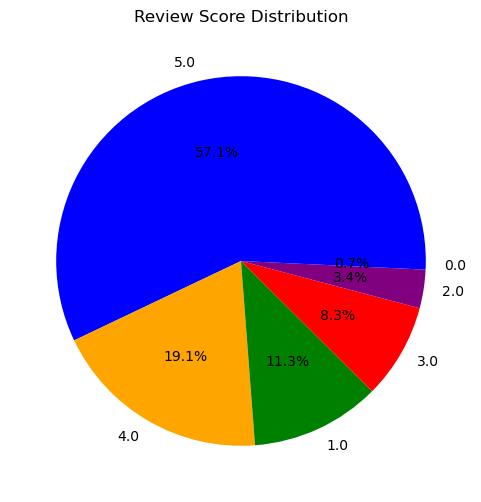

In [217]:
review_distribution = df['review_score'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(review_distribution, labels=review_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Review Score Distribution')
plt.show()

## Top 10 Products with Most 5-Star Ratings


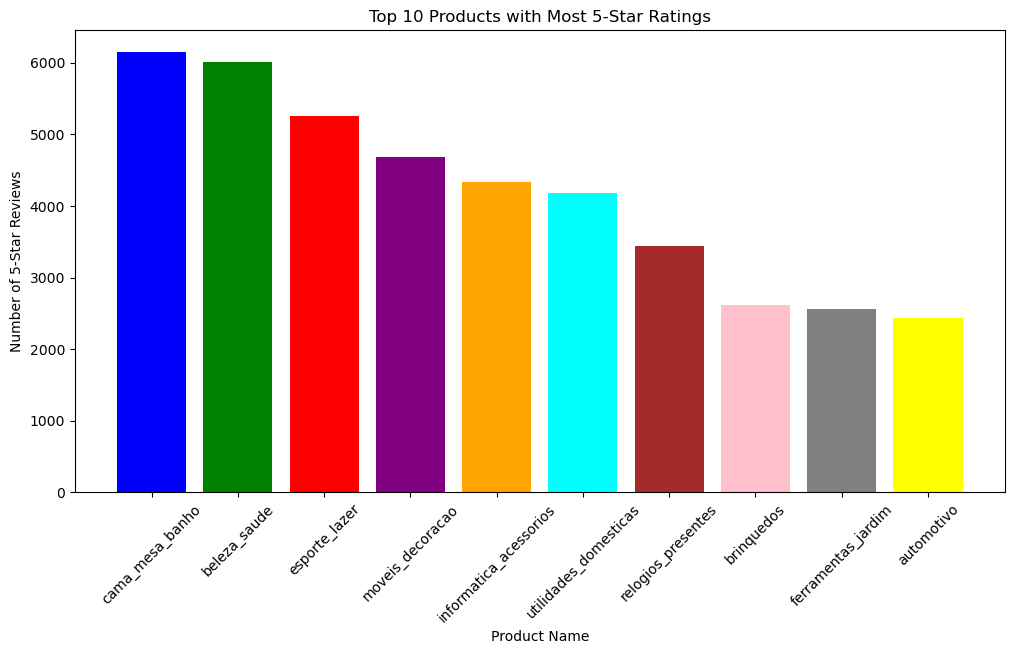

In [225]:
import matplotlib.pyplot as plt

# Filter products with only 5-star ratings
top_5star_products = df[df['review_score'] == 5]

# Count the number of 5-star reviews for each product name
top_10_products = top_5star_products['product_category_name'].value_counts().head(10)

# Plot the top 10 products with the most 5-star reviews
plt.figure(figsize=(12, 6))
plt.bar(top_10_products.index, top_10_products.values, 
        color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown', 'pink', 'gray', 'yellow'])

plt.xlabel('Product Name')
plt.ylabel('Number of 5-Star Reviews')
plt.title('Top 10 Products with Most 5-Star Ratings')
plt.xticks(rotation=45)
plt.show()


## Bottom 10 Products with Least Number of Low Ratings

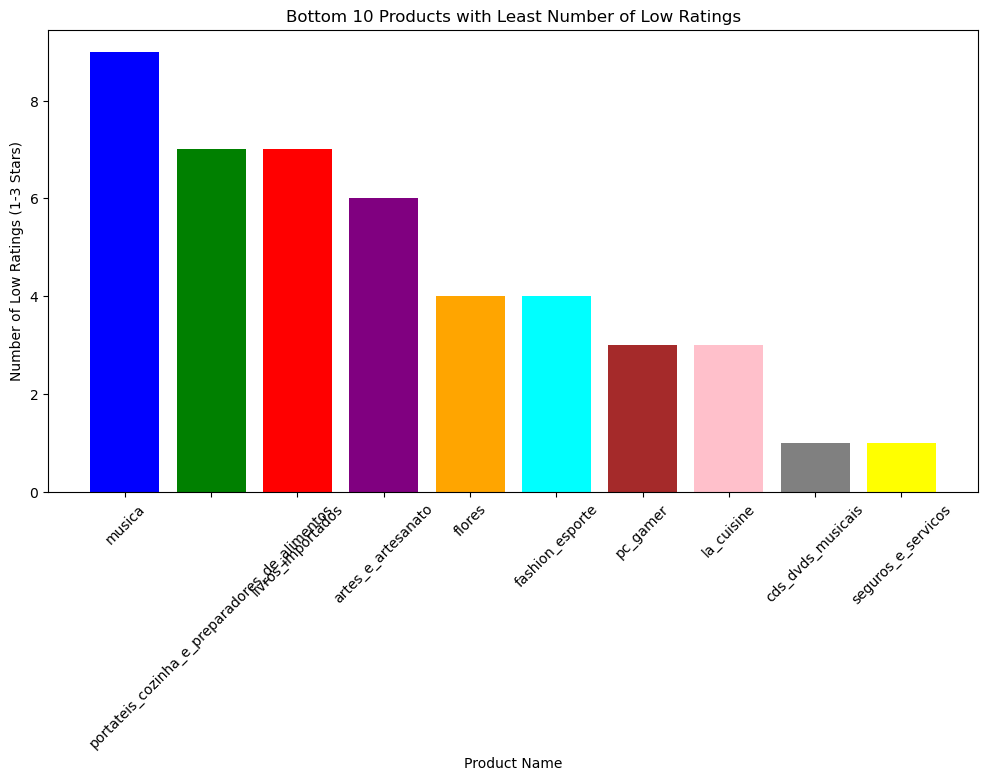

In [228]:
import matplotlib.pyplot as plt

# Filter products with 1-star, 2-star, or 3-star ratings
low_rated_products = df[df['review_score'].isin([1, 2, 3])]

# Count the number of low ratings for each product name
bottom_10_products = low_rated_products['product_category_name'].value_counts().tail(10)

# Plot the bottom 10 products with the least number of low ratings
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_products.index, bottom_10_products.values, 
        color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown', 'pink', 'gray', 'yellow'])

plt.xlabel('Product Name')
plt.ylabel('Number of Low Ratings (1-3 Stars)')
plt.title('Bottom 10 Products with Least Number of Low Ratings')
plt.xticks(rotation=45)
plt.show()


## Positive vs Negative Reviews

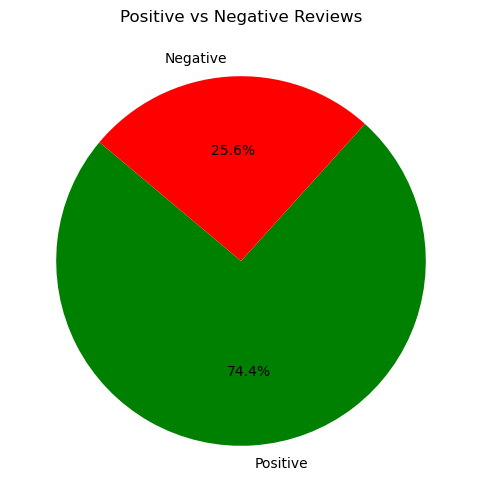

In [68]:
# Classify Reviews
df['review_category'] = df['review_score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Count
review_sentiment = df['review_category'].value_counts()

# Colors
colors = ['green', 'red']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(review_sentiment, labels=review_sentiment.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Positive vs Negative Reviews")

plt.show()


## Average Review Score by Day

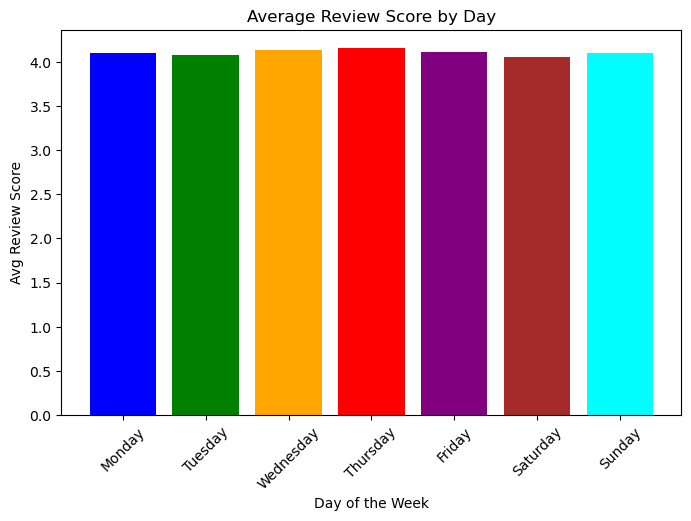

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')

# Group by day name
daily_avg = df.groupby(df['review_creation_date'].dt.day_name())['review_score'].mean()

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(days_order)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(daily_avg.index, daily_avg.values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan'])

plt.xlabel("Day of the Week")
plt.ylabel("Avg Review Score")
plt.title("Average Review Score by Day")
plt.xticks(rotation=45)

plt.show()


## Average Review Score by Year

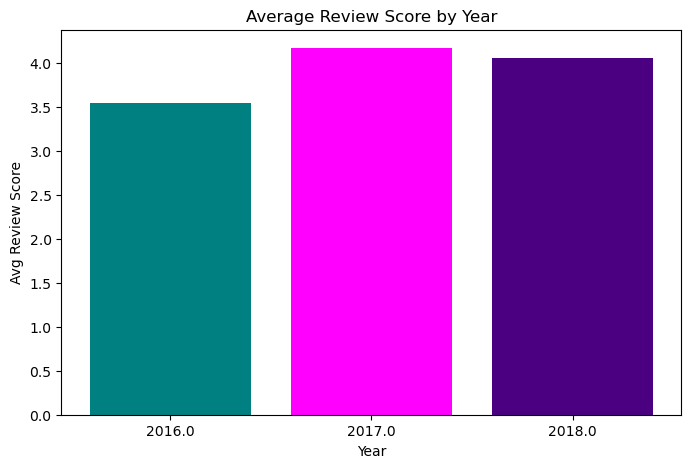

In [191]:
# Convert to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')

# Group by year
yearly_avg = df.groupby(df['review_creation_date'].dt.year)['review_score'].mean()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(yearly_avg.index.astype(str), yearly_avg.values, color=['teal', 'magenta', 'indigo'])

plt.xlabel("Year")
plt.ylabel("Avg Review Score")
plt.title("Average Review Score by Year")

plt.show()


### KPI'S

In [165]:
avg_review_score = df['review_score'].mean()
review_distribution = df['review_score'].value_counts().sort_index()
five_star_percentage = (review_distribution[5] / review_distribution.sum()) * 100
review_completion_rate = df['review_comment_message'].notna().mean() * 100


In [155]:
# Total Reviews
total_reviews = df['review_id'].nunique()

# Average Review Score
avg_review_score = df['review_score'].mean()

# Most Common Review Titles
common_review_titles = df['review_comment_title'].value_counts().head(10)

# Review Comment Length Distribution
df['review_comment_length'] = df['review_comment_message'].str.len()
avg_review_comment_length = df['review_comment_length'].mean()

# Positive vs Negative Reviews (Assume score >= 4 as positive)
positive_reviews = df[df['review_score'] >= 4].shape[0]
negative_reviews = df[df['review_score'] < 4].shape[0]


## Average Review Score by Month

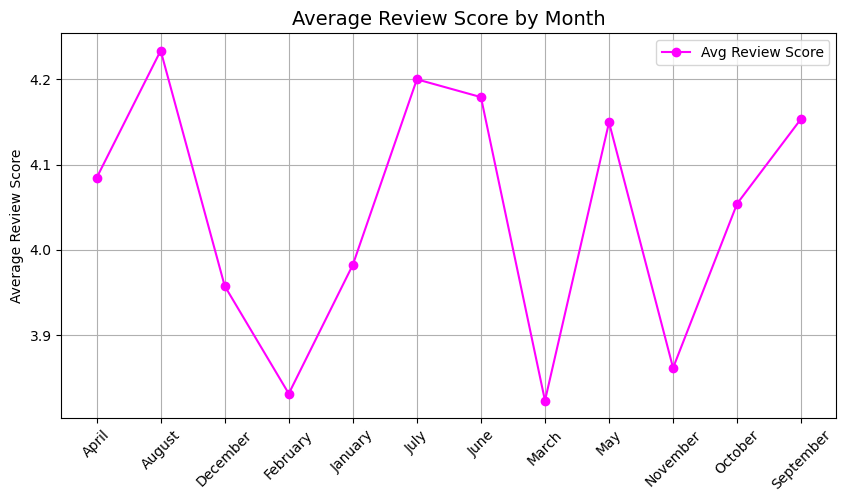

In [198]:
# 5️⃣ Average Review Score for Each Month
monthly_avg_review = df.groupby('order_month')['review_score'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_review.index, monthly_avg_review, marker='o', linestyle='-', color='magenta', label='Avg Review Score')
plt.title("Average Review Score by Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Average Review Score")
plt.grid(True)
plt.legend()
plt.show()

## Most Common Review Titles

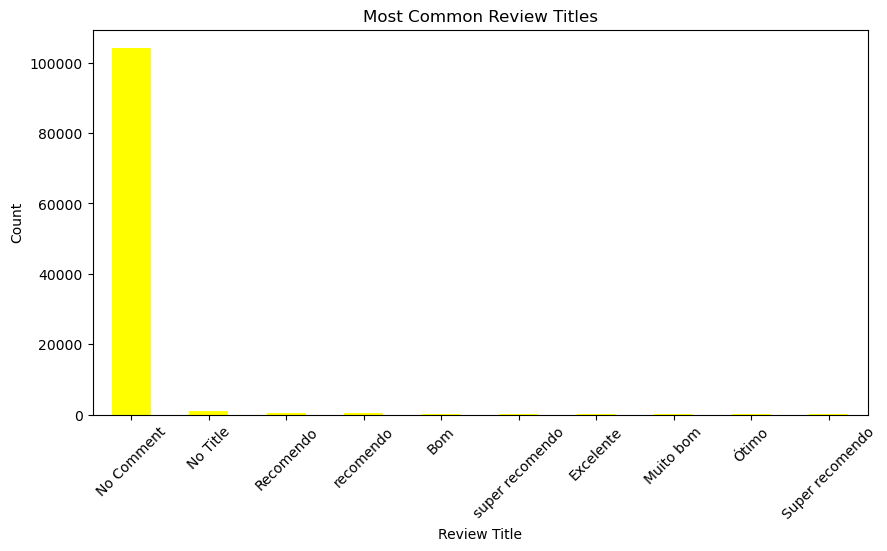

In [161]:
# Most Common Review Titles
plt.figure(figsize=(10,5))
common_review_titles.plot(kind='bar', color='yellow')
plt.title("Most Common Review Titles")
plt.xlabel("Review Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Distribution of Review Comment Length

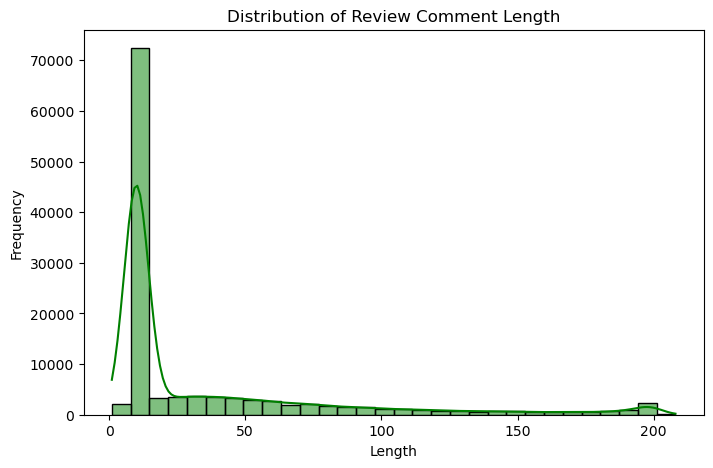

In [163]:
# Review Comment Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['review_comment_length'], bins=30, kde=True, color="green")
plt.title("Distribution of Review Comment Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


## Positive vs Negative Reviews

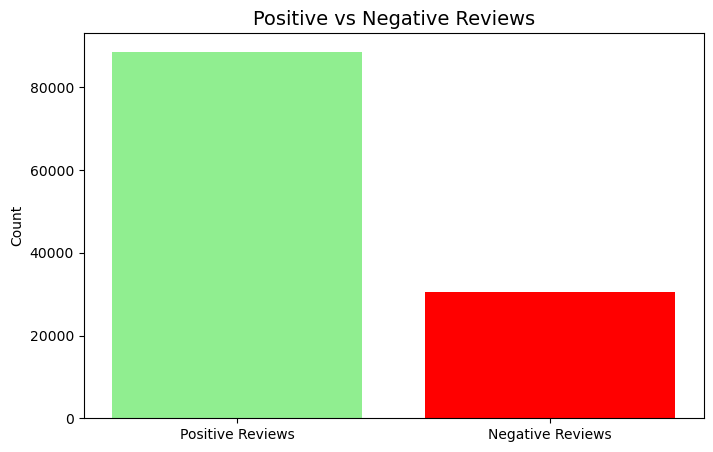

In [165]:
# Positive vs Negative Reviews
plt.figure(figsize=(8,5))
plt.bar(["Positive Reviews", "Negative Reviews"], [positive_reviews, negative_reviews], color=["lightgreen", "red"])
plt.title("Positive vs Negative Reviews", fontsize=14)
plt.ylabel("Count")
plt.show()


##  Scatter plot Plot: Sales Distribution by Review Score

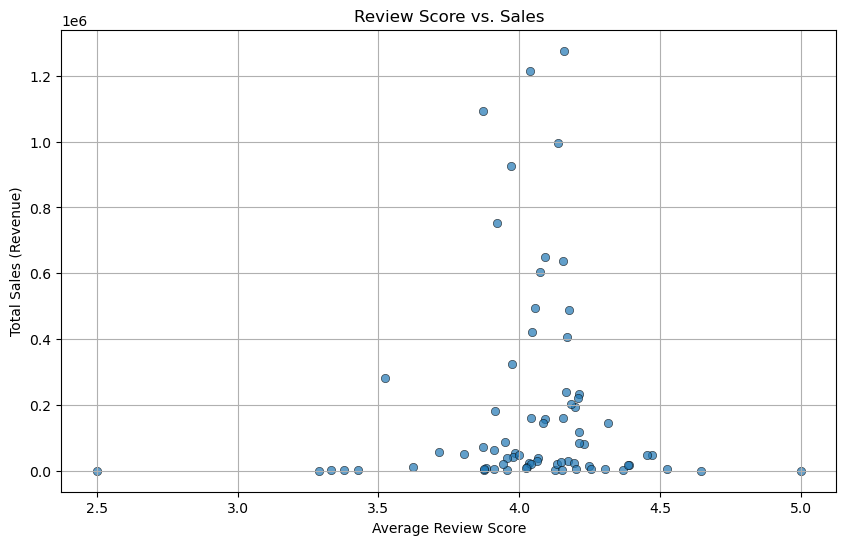

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product and calculate average review score and total sales (assuming price * number of sales)
sales_review_data = df.groupby('product_category_name').agg({'review_score': 'mean', 'price': 'sum'}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_review_data['review_score'], y=sales_review_data['price'], alpha=0.7, edgecolor='black')

plt.xlabel('Average Review Score')
plt.ylabel('Total Sales (Revenue)')
plt.title('Review Score vs. Sales')
plt.grid(True)
plt.show()


##  Box Plot: Sales Distribution by Review Score

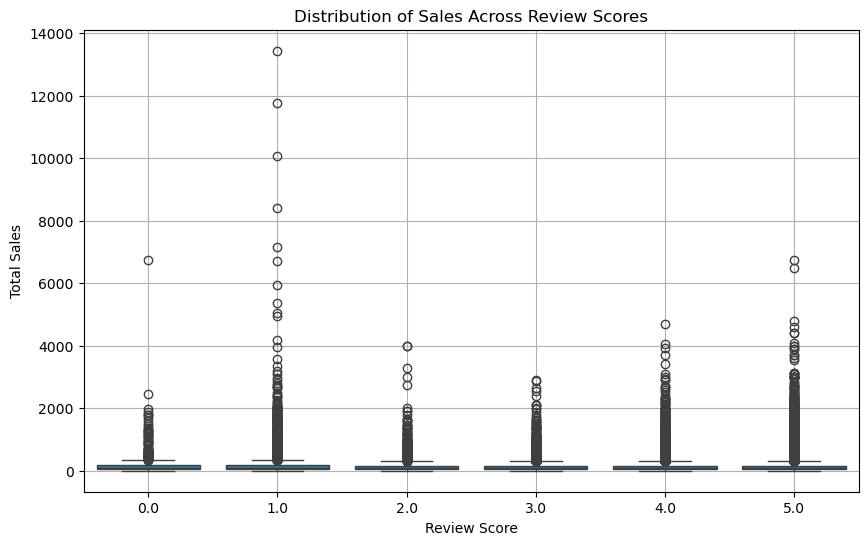

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sales data = price * order count
df['sales'] = df['price'] * df['order_item_id']

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['review_score'], y=df['sales'])

plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales Across Review Scores')
plt.grid(True)
plt.show()


payment_type
credit_card    49014
boleto         12788
voucher         3511
debit_card      1030
Name: count, dtype: int64


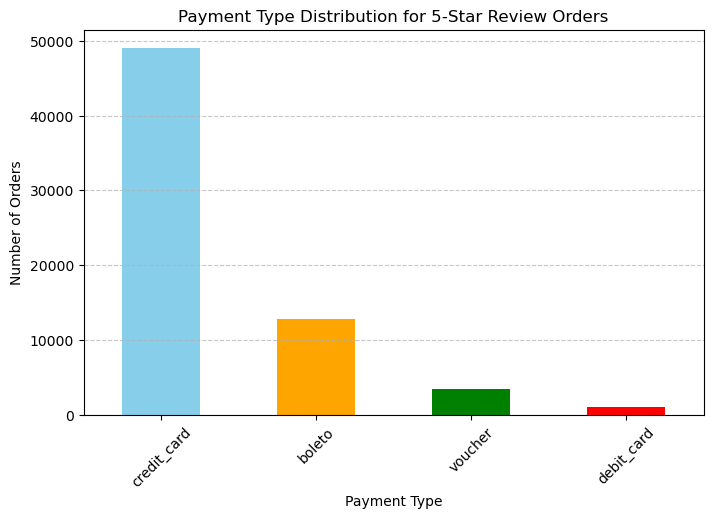

In [58]:
 

# Filter orders with 5-star reviews
five_star_orders = df[df["review_score"] == 5]

# Count payment type distribution
payment_distribution = five_star_orders["payment_type"].value_counts()

# Print the distribution
print(payment_distribution)

# Plot the distribution
plt.figure(figsize=(8, 5))
payment_distribution.plot(kind="bar", color=["skyblue", "orange", "green", "red"])
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")
plt.title("Payment Type Distribution for 5-Star Review Orders")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


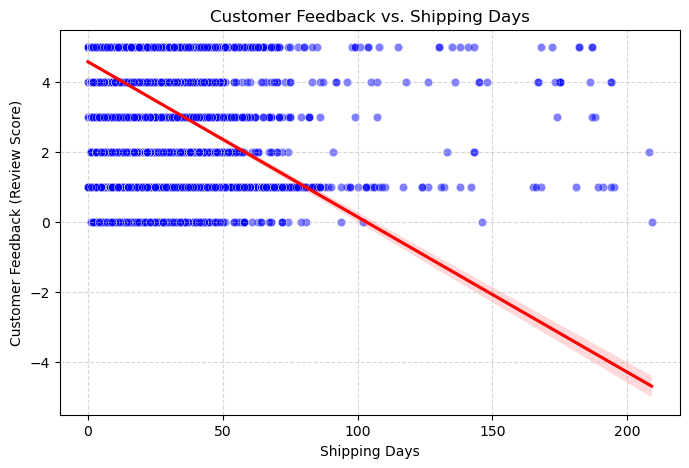

In [66]:
df["shipping_days"] = (pd.to_datetime(df["order_delivered_customer_date"]) - pd.to_datetime(df["order_purchase_timestamp"])).dt.days

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["shipping_days"], y=df["review_score"], alpha=0.5, color="blue")

# Optional: Add trend line
sns.regplot(x=df["shipping_days"], y=df["review_score"], scatter=False, color="red")

# Labels & Title
plt.xlabel("Shipping Days")
plt.ylabel("Customer Feedback (Review Score)")
plt.title("Customer Feedback vs. Shipping Days")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()